# SC1015 Project : Titanic Dataset \(Group 8\)

---

## Introduction

The RMS Titanic was a British luxury passenger as well as mail carrying ocean liner. Before the disaster, the RMS Titanic was deemed "unsinkable" However, on 15 April 1912, during its voyage from Southhampton, England to New York City, United States, it crashed into an iceberg at the North Atlantic Ocean and as a result sank. Tragically, about 1,500 of the estimated 2,224 passengers and crew aboard perished as the ship was not equipped with enough lifeboats for everyone, triggering the deadliest sinking of a single ship during that period. 

The Titanic dataset from Kaggle consists of some information of 892 passangers. 

---

## Dataset Label

| **Label** | **Definition** | **Key** |
|----------------|----------------|---------|
| **survival**       | Whether the passenger survived | 0 = No, 1 = Yes |


## Dataset Features

| **Feature** | **Definition** | **Key** |
|----------------|----------------|---------|
| **pclass** | Ticket class | 1 = 1st, 2 = 2nd, 3 = 3rd |
| **sex** | Gender of the passenger | male, female |
| **Age** | Age in years | |
| **sibsp** | number of siblings/spouses aboard the Titanic | |
| **parch** | number of parents/children aboard the Titanic | |
| **ticket** | Ticket number | |
| **cabin** | Cabin number | |
| **embarked** | Port of Emabarkation | C = Cherbourg, Q = Queenstown, S = Southhampton | |  

<br>

**Attribute Notes**

**age:** Age is fractional if less than 1. If the age is estimated, it is in the form of xx.5  <br/><br/>

**sibsp:** The dataset defines family relations in this way,

Sibling = brother, sister, stepbrother, stepsister

Spouse = husband, wife (mistresses and fiancés were ignored)  <br/><br/>


**parch:** The dataset defines family relations in this way,

Parent = mother, father

Child = daughter, son, stepdaughter, stepson

Some children travelled only with a nanny, therefore `parch = 0` for them.

---



### Essential Libraries

Let us begin by importing the essential Python Libraries.

> NumPy : Library for Numeric Computations in Python
>
> Pandas : Library for Data Acquisition and Preperation
>
> Matplotlib : Low\-level library for Data Visualization
>
> Seaborn : Higher\-level library for Data Visualization
>
> Lime : Library for explaining predictions made by machine learning model


---

### Essential Models 

Let us begin by importing the essential models and functions from Scikit-Learn

> `LinearRegression` : Model for performing Linear Regression.
>
> `DecisionTreeClassifier` : A decision tree classifier.
>
> `train_test_split` : Split arrays or matrices into random train and test subsets.
>
> `cross_val_score` : Evaluate model through cross-validation.
>
> `RandomForestClassifier` : A random forest classifier.
>
> `accuracy_score` : For calculating accuracy of classification models.
>
> `classification_report` : For displaying main classifications metrics
>
> `confusion_matrix` : Compute confusion matrix to evaluate the accuracy of a classification.
>
> `ConfusionMatrixDisplay` : For displaying the confusion matrix.
> 
> `RocCurveDisplay` : For displaying the ROC curve.
> 
> `plot_tree` : For plotting a decision tree.
>
> `lime_tabular` : For explaining tabular data.
>
> `lime_text` : For explaining text classifiers.
---


In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import lime
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay
from sklearn.tree import plot_tree
import lime.lime_tabular
import lime.lime_text

---

## Setup : Import the Dataset

Dataset on Titanic Incident : Attached file `train.csv`

Want to find : Which features from the dataset affects the survival rate of the passengers onboard the Titanic.


In [2]:
df = pd.read_csv("train.csv")
df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Let's list down all our observations from the super-quick glance of the dataset, as above.  
* There are `12` variables/features/columns and `891` observations/samples/rows in the dataset.    
* The response variable seems to be `Survived`, while the remaining 11 are most likely predictors.     
* There are `5` variables identified as `int64` by default, and it seems they are indeed Numeric.     
* There are `5` variables identified as `object` by default, and they are most likely Categorical.  
* There are `2` variables identified as `float64` by default, and they are most likely Numeric.
* `3` of the variables/features seem to have missing value (have to check again, carefully).

---

## Data Cleaning

Firstly, we check for the NULL values in the titanic dataset


In [4]:
#Checking for null values
total = df.isnull().sum().sort_values(ascending=False)
p1 = df.isnull().sum()/df.isnull().count()*100
p2 = (round(p1, 1)).sort_values(ascending=False)
nulls = pd.concat([total, p2], axis=1, keys=["Total", "%"])
nulls.head(13)

Total     %
Cabin          687  77.1
Age            177  19.9
Embarked         2   0.2
PassengerId      0   0.0
Survived         0   0.0
Pclass           0   0.0
Name             0   0.0
Sex              0   0.0
SibSp            0   0.0
Parch            0   0.0
Ticket           0   0.0
Fare             0   0.0

In [5]:
# Dropping 'Name', 'Ticket', 'PassengerId', 'Fare' in train dataset
df = df.drop(["Name"], axis=1)
df = df.drop(["Ticket"], axis=1)
df = df.drop(["PassengerId"], axis=1)
df = df.drop(["Fare"], axis=1)
df = df.drop(["Cabin"], axis=1)
df.shape

(891, 7)

**Columns Removed:**

> `PassengerId`
>
> `Name`
>
> `Ticket`
>
> `Fare`
>
> `Cabin`

Removing `Name` and `PassengerId` because each row is unique for every passenger. Thus, would not be of much help with the predicting of survivability.  
Removing `Ticket` and `Fare` because it does not tell us much about the survivability   
Removing `Cabin` because of the large number of missing values.


<span style='font-size:medium'>**Handling missing values for Age**</span>


<Axes: >

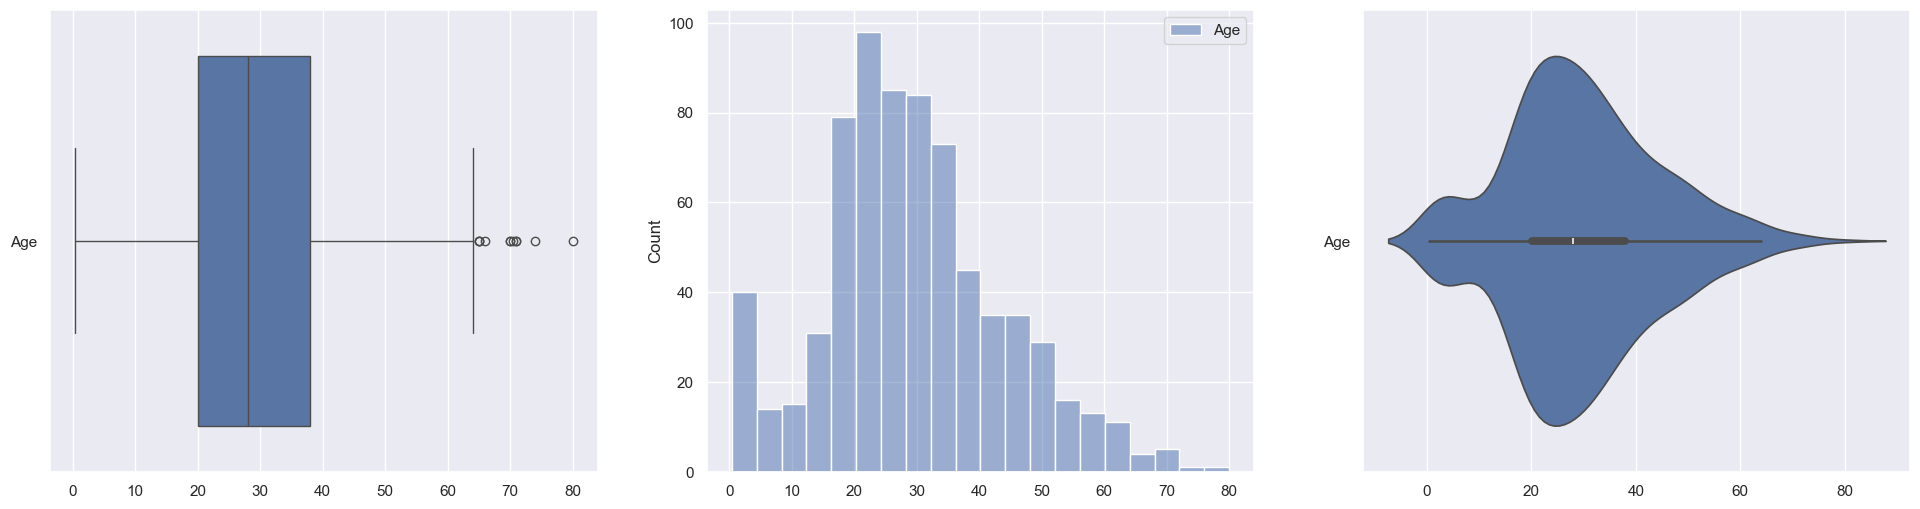

In [6]:
age = df[["Age"]]
f, axes = plt.subplots(1, 3, figsize=(24, 6))
sb.boxplot(data = age, orient = "h", ax = axes[0])
sb.histplot(data = age, ax = axes[1])
sb.violinplot(data = age, orient = "h", ax = axes[2])

In [7]:
# Extract relevant features for linear regression
features = ['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked', 'Age']

# One-hot encode 'Sex'
df_encoded = pd.get_dummies(df[features], columns=['Sex'], drop_first=True)
df_encoded = pd.get_dummies(df[features], columns=['Embarked'], drop_first=True)

features.remove("Sex")
features.remove("Embarked")

# Remove 'Age' from the features for the training set
features_without_age = features
features_without_age.remove("Age")

# Split the data into training and test sets
train_data = df_encoded[df_encoded['Age'].notnull()]
test_data = df_encoded[df_encoded['Age'].isnull()]

X_train = train_data[features_without_age]
y_train = train_data['Age']
X_test = test_data[features_without_age]

# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict the missing 'Age' values
predicted_age = model.predict(X_test)

# Fill in missing 'Age' values with predicted values
df.loc[df['Age'].isnull(), 'Age'] = predicted_age

<Axes: >

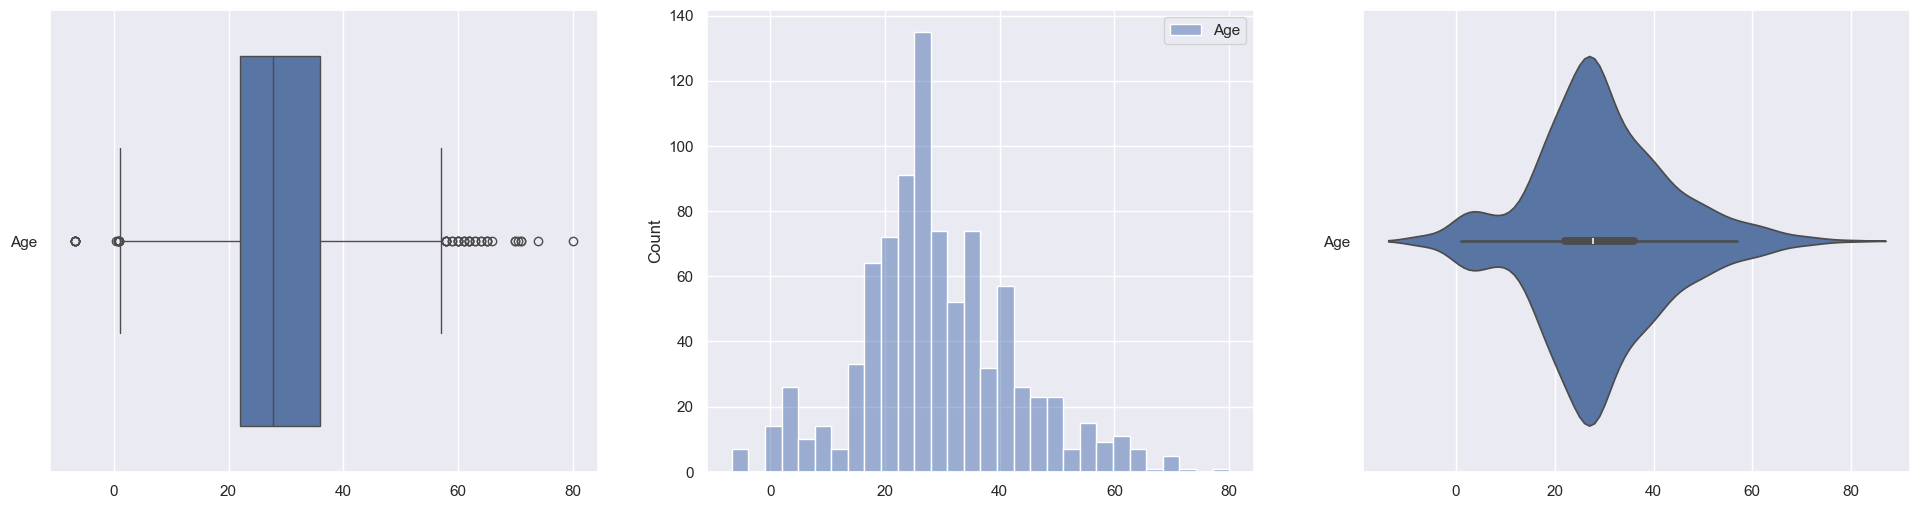

In [8]:
age = df[["Age"]]
f, axes = plt.subplots(1, 3, figsize=(24, 6))
sb.boxplot(data = age, orient = "h", ax = axes[0])
sb.histplot(data = age, ax = axes[1])
sb.violinplot(data = age, orient = "h", ax = axes[2])

We have decided to use a linear regression model to predict missing values for `Age` because we feel that `Age` might be a possible predictor for survivability and removing the column might not be an option. Removing the rows would also not be great as the number of missing values for `Age` is 177 which is about 20% of the total number of rows of the train dataset. By filling the missing values with the median would also not be good as due the large number of missing values, the distribution would also be affected.

In [9]:
total = df.isnull().sum().sort_values(ascending=False)
p1 = df.isnull().sum()/df.isnull().count()*100
p2 = (round(p1, 1)).sort_values(ascending=False)
nulls = pd.concat([total, p2], axis=1, keys=["Total", "%"])
nulls.head(13)

Total    %
Embarked      2  0.2
Survived      0  0.0
Pclass        0  0.0
Sex           0  0.0
Age           0  0.0
SibSp         0  0.0
Parch         0  0.0

<span style='font-size:medium'>**Handling missing values for Embarked**</span>


In [10]:
df = df.dropna()
df.shape

(889, 7)

In [11]:
total = df.isnull().sum().sort_values(ascending=False)
p1 = df.isnull().sum()/df.isnull().count()*100
p2 = (round(p1, 1)).sort_values(ascending=False)
nulls = pd.concat([total, p2], axis=1, keys=["Total", "%"])
nulls.head(13)

Total    %
Survived      0  0.0
Pclass        0  0.0
Sex           0  0.0
Age           0  0.0
SibSp         0  0.0
Parch         0  0.0
Embarked      0  0.0

We decided to drop the 2 rows with the missing embarked values as the distribution would not be affected that much.

---

## Exploratory Data Analysis of the Titanic dataset

Next, let us start exploring the response variable `Survived`, the one we are supposed to predict at the end of the day.


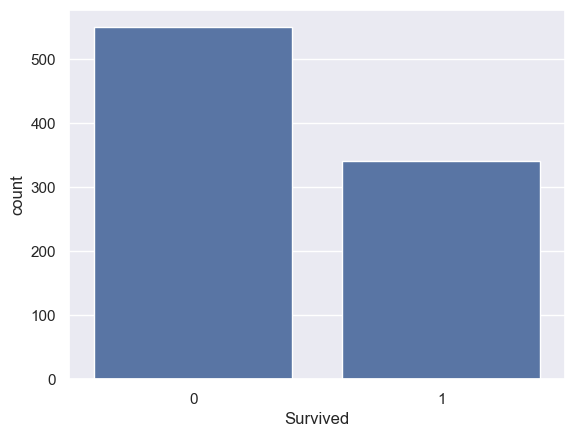


Survived: 340 (38.25%)
Not-survived: 549 (61.75%)


In [12]:
sb.countplot(x ='Survived', data=df)
plt.show()

survived = df['Survived'].sum()
dead = df['Survived'].count() - survived

print()
print(f"Survived: {survived} ({(survived/df['Survived'].count() * 100):.2f}%)")
print(f"Not-survived: {dead} ({(dead/df['Survived'].count() * 100):.2f}%)")

Ratio of classes is Survived : Not-survived = 340 : 549

Based on the plot for `Survived`, we can see that majority of the passengers did not survived. We can also see a large class imbalance in the Response variable. Unless we fix this, Classification models may face some problems later.  

Checking out the Numeric and Categorical predictors separately, as the standard functions behave differently for them.

In [13]:
# Numeric Predictors 
df[['Pclass', 'Age', 'SibSp', 'Parch']].describe()

Pclass         Age       SibSp       Parch
count  889.000000  889.000000  889.000000  889.000000
mean     2.311586   29.245360    0.524184    0.382452
std      0.834700   13.583094    1.103705    0.806761
min      1.000000   -6.724481    0.000000    0.000000
25%      2.000000   22.000000    0.000000    0.000000
50%      3.000000   27.703111    0.000000    0.000000
75%      3.000000   36.000000    1.000000    0.000000
max      3.000000   80.000000    8.000000    6.000000

In [14]:
# Categorical Predictors
df[['Sex', 'Embarked']].describe()

Sex Embarked
count    889      889
unique     2        3
top     male        S
freq     577      644

Time for some visualizations to check the distribution of the predictor variables, one by one, for both Numeric and Categorical predictors. 

**Plotting gender distribution** 

/Users/ggna/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


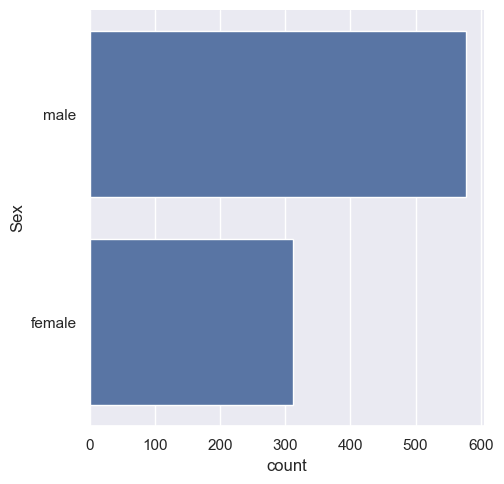


Male: 577 (64.90%)
Female: 312 (35.10%)


In [15]:
sb.catplot(y= 'Sex', data = df, kind = "count")
plt.show()

male = df[df['Sex'] == 'male'].count()
female = df[df['Sex'] == 'female'].count()
total= male['Sex']+female['Sex']

print()
print(f"Male: {male['Sex']} ({((male['Sex']/total)*100):.2f}%)")
print(f"Female: {female['Sex']} ({((female['Sex']/total)*100):.2f}%)")

Based on the plot for `Sex`, we can see that majority of the passengers are male.



<span style='font-size:medium'>**Plotting PClass**</span>


/Users/ggna/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


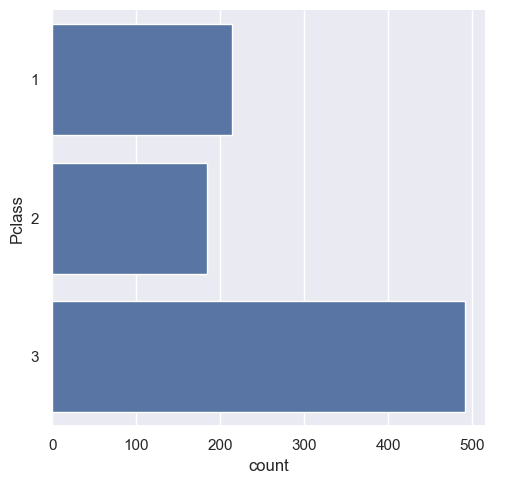


Class 1: 214 (24.07%)
Class 2: 184 (20.70%)
Class 3: 491 (55.23%)


In [16]:
sb.catplot(y= 'Pclass', data = df, kind = "count")
plt.show()

class_1 = df[df['Pclass'] == 1].count()
class_2 = df[df['Pclass'] == 2].count()
class_3 = df[df['Pclass'] == 3].count()

total = class_1['Pclass']+class_2['Pclass']+class_3['Pclass']

print()
print(f"Class 1: {class_1['Pclass']} ({((class_1['Pclass']/total)*100):.2f}%)")
print(f"Class 2: {class_2['Pclass']} ({((class_2['Pclass']/total)*100):.2f}%)")
print(f"Class 3: {class_3['Pclass']} ({((class_3['Pclass']/total)*100):.2f}%)")

Based on the plot for `PClass`, we can see that majority of the passengers are in class 3, which is the lowest class out of all the class.


/Users/ggna/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


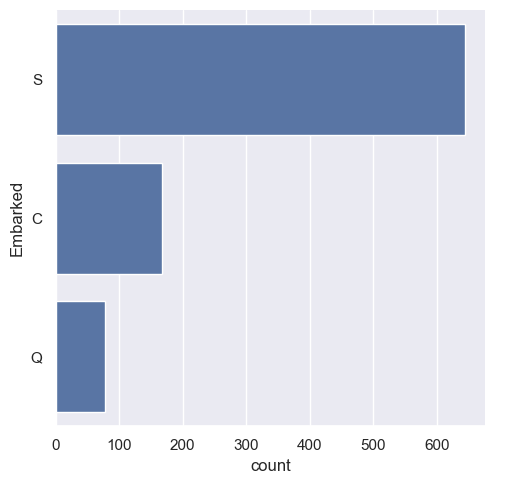


Embarked at Southampton: 644 (72.44%)
Embarked at Cherbourg: 168 (18.90%)
Embarked at Queenstown: 77 (8.66%)


In [17]:
sb.catplot(y= 'Embarked', data = df, kind = "count")
plt.show()

S = df[df['Embarked'] == 'S'].count()
C = df[df['Embarked'] == 'C'].count()
Q = df[df['Embarked'] == 'Q'].count()

total = S['Embarked']+C['Embarked']+Q['Embarked']

print()
print(f"Embarked at Southampton: {S['Pclass']} ({((S['Pclass']/total)*100):.2f}%)")
print(f"Embarked at Cherbourg: {C['Pclass']} ({((C['Pclass']/total)*100):.2f}%)")
print(f"Embarked at Queenstown: {Q['Pclass']} ({((Q['Pclass']/total)*100):.2f}%)")

Based on the plot for `Embarked,` we can see that majority of the passenger embarked at  Southampton.


<span style='font-size:x-large'>**Relationship of different Variables against Survivability**</span><span style='font-size:x-large'> </span>

Now that we understand the indivudal predictors better, let's find out what causes Survived or Not-Survived. 

**Plotting Gender Distribution of Survived vs Not-Survived**

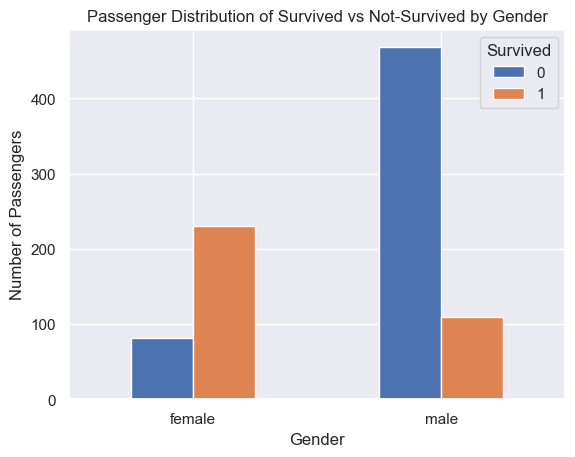

In [18]:
# Plotting the passenger distribution of survived vs not-survived based on gender

import matplotlib.pyplot as plt
import seaborn as sns

# Grouping data by gender and survival status
gender_survived = df.groupby(['Sex', 'Survived']).size().unstack()

# Plotting the grouped data
gender_survived.plot(kind='bar', stacked=False)
plt.xlabel('Gender')
plt.ylabel('Number of Passengers')
plt.title('Passenger Distribution of Survived vs Not-Survived by Gender')
plt.xticks(rotation=0)

plt.show()

Based on the plot we can see that majority of the Male passengers approximately 475 did not survived while majority of the Female passengers approximately 225 survived.

In [19]:
df_temp = df.drop(["Embarked"], axis=1)
df_temp.groupby('Sex').mean()

Survived    Pclass        Age     SibSp     Parch
Sex                                                      
female  0.740385  2.166667  27.395148  0.698718  0.653846
male    0.188908  2.389948  30.245821  0.429809  0.235702

From the data we can see that `female` are more likely to survive as compared to `male. With` 74% of the females surviving as compared to`19%` of the male. 


<span style='font-size:medium'>**Plotting PClass**</span><span style='font-size:medium'> </span><span style='font-size:medium'>**against**</span><span style='font-size:medium'> </span><span style='font-size:medium'>**Survived**</span>


/Users/ggna/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


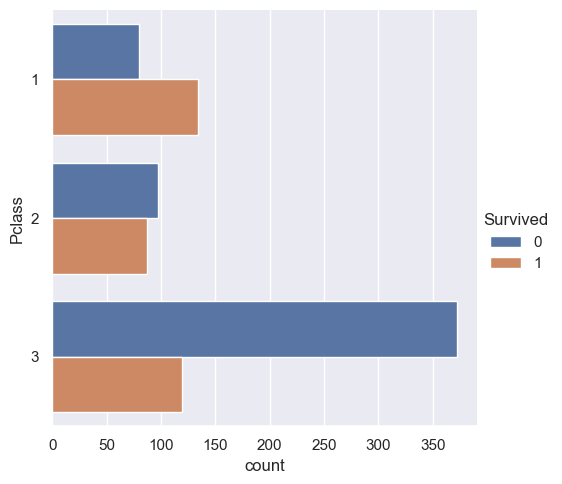

In [20]:
sb.catplot(y= 'Pclass', data = df, kind = "count", hue=df["Survived"])

Survival Rate by Passenger Class:
Pclass
1    62.6
2    47.3
3    24.2
Name: Survived, dtype: float64


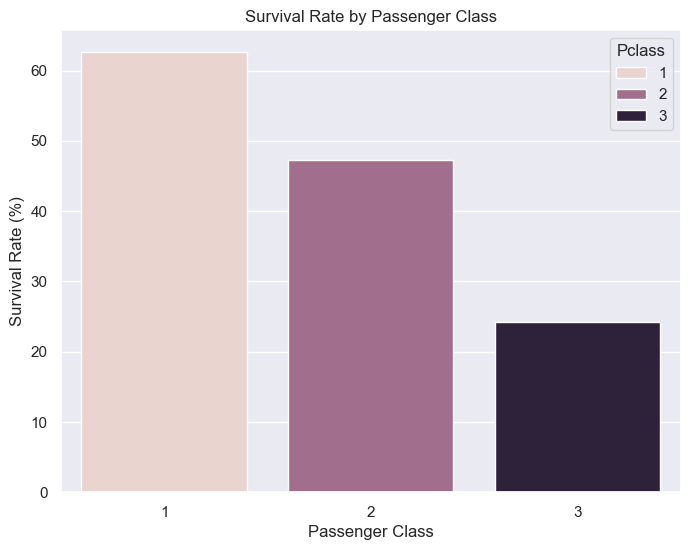

In [21]:
# Calculate survival rates by passenger class
class_survival_rate = round(df.groupby('Pclass')['Survived'].mean() * 100,1)
print("Survival Rate by Passenger Class:")
print(class_survival_rate)

# Plot survival rates by passenger class
plt.figure(figsize=(8, 6))
sb.barplot(x=class_survival_rate.index, y=class_survival_rate.values, hue=class_survival_rate.index)
plt.title('Survival Rate by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate (%)')
plt.show()

Passengers in the lower class, specifically third class, has the largest amount of passengers that did not survived the tragedy based on the categorical plot. After plotting the survival rate according to `Pclass`, it also shows that the passengers that is in the upper class had the highest survival rate as compared to the lower class. This might mean that during the evacuation, passengers of the upper class are prioritized instead of the lower class passsengers.

**Plotting the survival rate based on Family Size**

Survival Rate by Family Size:
Family_Size
1     30.093458
2     55.279503
3     57.843137
4     72.413793
5     20.000000
6     13.636364
7     33.333333
8      0.000000
11     0.000000
Name: Survived, dtype: float64


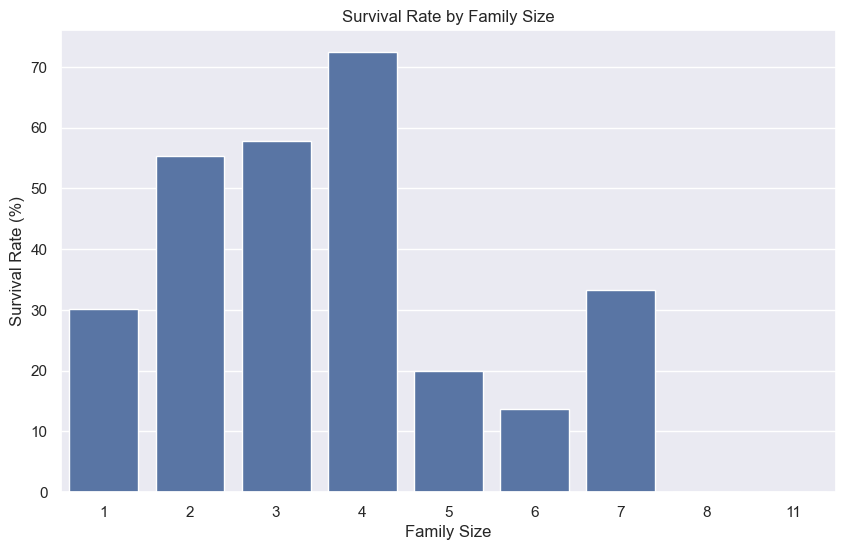

In [22]:
# Create a new feature 'Family_Size' combining 'SibSp' and 'Parch'
df['Family_Size'] = df['SibSp'] + df['Parch'] + 1
# Analyze survival rates for passengers traveling alone versus those with family members
survival_by_family_size = df.groupby('Family_Size')['Survived'].mean() * 100
print("Survival Rate by Family Size:")
print(survival_by_family_size)
# Plot survival rates by family size
plt.figure(figsize=(10, 6))
sb.barplot(x=survival_by_family_size.index, y=survival_by_family_size.values)
plt.title('Survival Rate by Family Size')
plt.xlabel('Family Size')
plt.ylabel('Survival Rate (%)')
plt.show()

Based on the plot of the survival rate based on the family size of the passengers, it shows that passengers of family size of 4 had the highest survival rate followed by family size of 3 then 2.

**Plotting survival against Alone**

First we start by creating a new column `Alone` using `SibSp` and `Parch` as both columns represent the number of siblings, spouse, parent and children that is accompanied by the passenger.

In [23]:
def calc_new_col(row):
    if row['SibSp'] == 0 and row['Parch'] == 0:
        return 1
    else:
        return 0

df["Alone"] = df.apply(calc_new_col, axis=1)
df.head(10)

Survived  Pclass     Sex        Age  SibSp  Parch Embarked  Family_Size  \
0         0       3    male  22.000000      1      0        S            2   
1         1       1  female  38.000000      1      0        C            2   
2         1       3  female  26.000000      0      0        S            1   
3         1       1  female  35.000000      1      0        S            2   
4         0       3    male  35.000000      0      0        S            1   
5         0       3    male  27.703111      0      0        Q            1   
6         0       1    male  54.000000      0      0        S            1   
7         0       3    male   2.000000      3      1        S            5   
8         1       3  female  27.000000      0      2        S            3   
9         1       2  female  14.000000      1      0        C            2   

   Alone  
0      0  
1      0  
2      1  
3      0  
4      1  
5      1  
6      1  
7      0  
8      0  
9      0

In [24]:
df.shape

(889, 9)

/Users/ggna/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


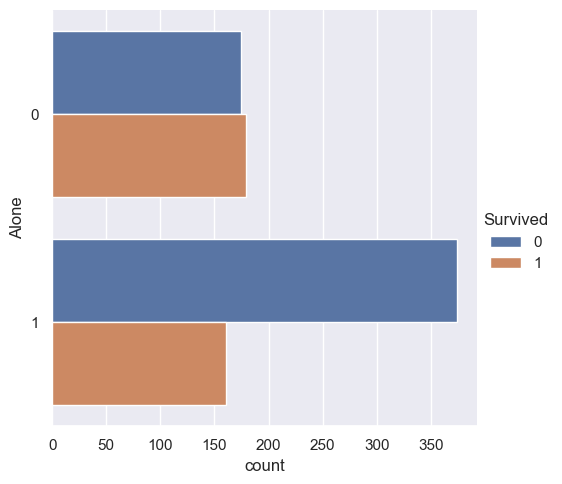

In [25]:
sb.catplot(y= 'Alone', data = df, kind = "count", hue=df["Survived"])

Further exploration of the categorical plot shows `Alone` == 1 (i.e. passengers were travelling alone). Based on the categorical plot, majority of the passengers travelled alone and approximately two-thirds of the passengers that travelled alone did not survive.

**Extracting the passengers that travelled alone**


In [26]:
df_alone = df.loc[df['Alone'] == 1]
df_alone.head()

Survived  Pclass     Sex        Age  SibSp  Parch Embarked  Family_Size  \
2          1       3  female  26.000000      0      0        S            1   
4          0       3    male  35.000000      0      0        S            1   
5          0       3    male  27.703111      0      0        Q            1   
6          0       1    male  54.000000      0      0        S            1   
11         1       1  female  58.000000      0      0        S            1   

    Alone  
2       1  
4       1  
5       1  
6       1  
11      1

In [27]:
df_alone.shape

(535, 9)

**Plotting distribution of the age of alone passengers**

<Axes: >

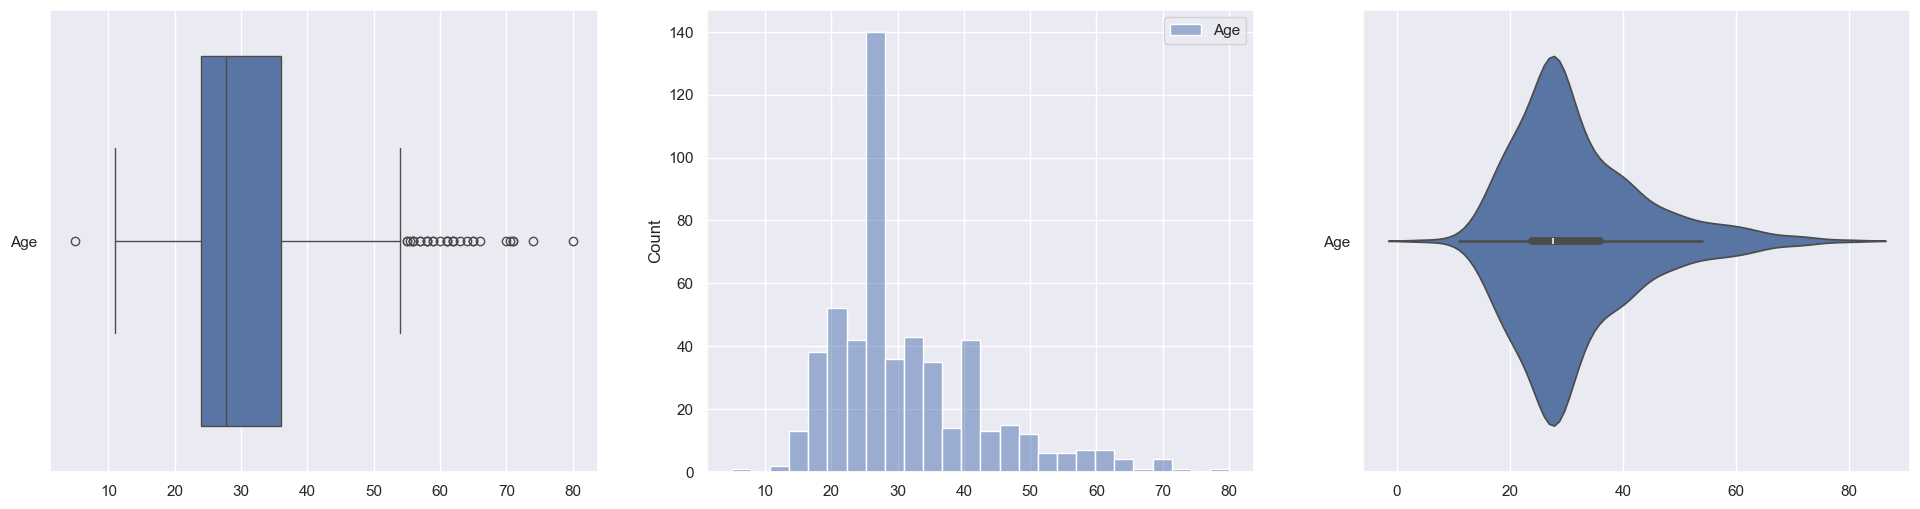

In [28]:
age = df_alone[["Age"]]
f, axes = plt.subplots(1, 3, figsize=(24, 6))
sb.boxplot(data = age, orient = "h", ax = axes[0])
sb.histplot(data = age, ax = axes[1])
sb.violinplot(data = age, orient = "h", ax = axes[2])

Based on the distribution of the age of the alone passengers, we can see that the plot is not very normally distributed and the violin plot shows that it is positively skewed. Based on the histogram, we can also see that there is a huge frequency of 140 alone passengers between the age of 25 to 28 years old.

**Plotting gender distribution of alone passengers**

<Axes: ylabel='count'>

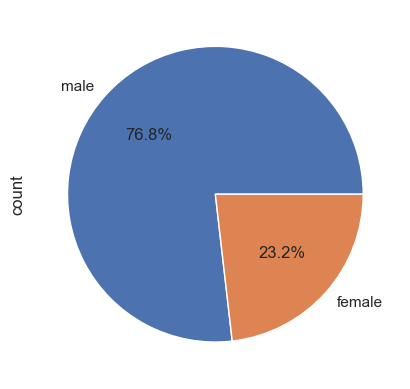

In [29]:
# df_alone["Sex"].value_counts().plot(kind="pie")

counts = df_alone['Sex'].value_counts(dropna=False)
counts.plot.pie(autopct='%1.1f%%')

Based on the pie chart, most of the passengers that travelled alone are males with 76.8% and 23.2% of females. 

**Plotting survival rate based on place of embarked**

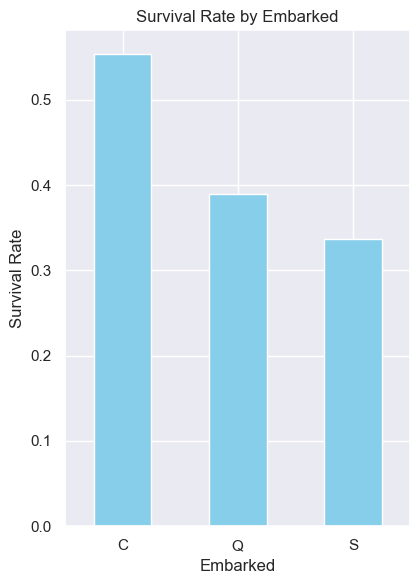

In [30]:
# Filter relevant columns
embarked_survived = df[['Embarked', 'Survived']]

# Group by 'Embarked' and calculate survival rates
survival_rates = embarked_survived.groupby('Embarked')['Survived'].mean()

# Plotting
plt.figure(figsize=(8, 6))

# Bar plot
plt.subplot(1, 2, 1)
survival_rates.plot(kind='bar', color='skyblue')
plt.title('Survival Rate by Embarked')
plt.xlabel('Embarked')
plt.ylabel('Survival Rate')
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()

Based on the barplot, we can see that the passengers that boarded the Titanic at Cherboug port, has the highest survival rate. Followed by Queenstown and then Southampton. As port Cherboug has the second highest number of passengers that boarded the Titanic and has the highest survival rate, it could mean that the evacuation procedures prioritizes passengers that boarded at Cherboug or the rooms where Cherboug passengers are located has a higher priority during the evacuation.

**One-hot encoding for Sex and Embarked**

In [31]:
df = pd.get_dummies(df, columns=["Sex", "Embarked"], dtype="int")
df.head(10)

Survived  Pclass        Age  SibSp  Parch  Family_Size  Alone  Sex_female  \
0         0       3  22.000000      1      0            2      0           0   
1         1       1  38.000000      1      0            2      0           1   
2         1       3  26.000000      0      0            1      1           1   
3         1       1  35.000000      1      0            2      0           1   
4         0       3  35.000000      0      0            1      1           0   
5         0       3  27.703111      0      0            1      1           0   
6         0       1  54.000000      0      0            1      1           0   
7         0       3   2.000000      3      1            5      0           0   
8         1       3  27.000000      0      2            3      0           1   
9         1       2  14.000000      1      0            2      0           1   

   Sex_male  Embarked_C  Embarked_Q  Embarked_S  
0         1           0           0           1  
1         0           1           0           0  
2         0           0           0           1  
3         0           0           0           1  
4         1           0           0           1  
5         1           0           1           0  
6         1           0           0           1  
7         1           0           0           1  
8         0           0           0           1  
9         0           1           0           0

**Plotting Heatmap based on features**

<Axes: >

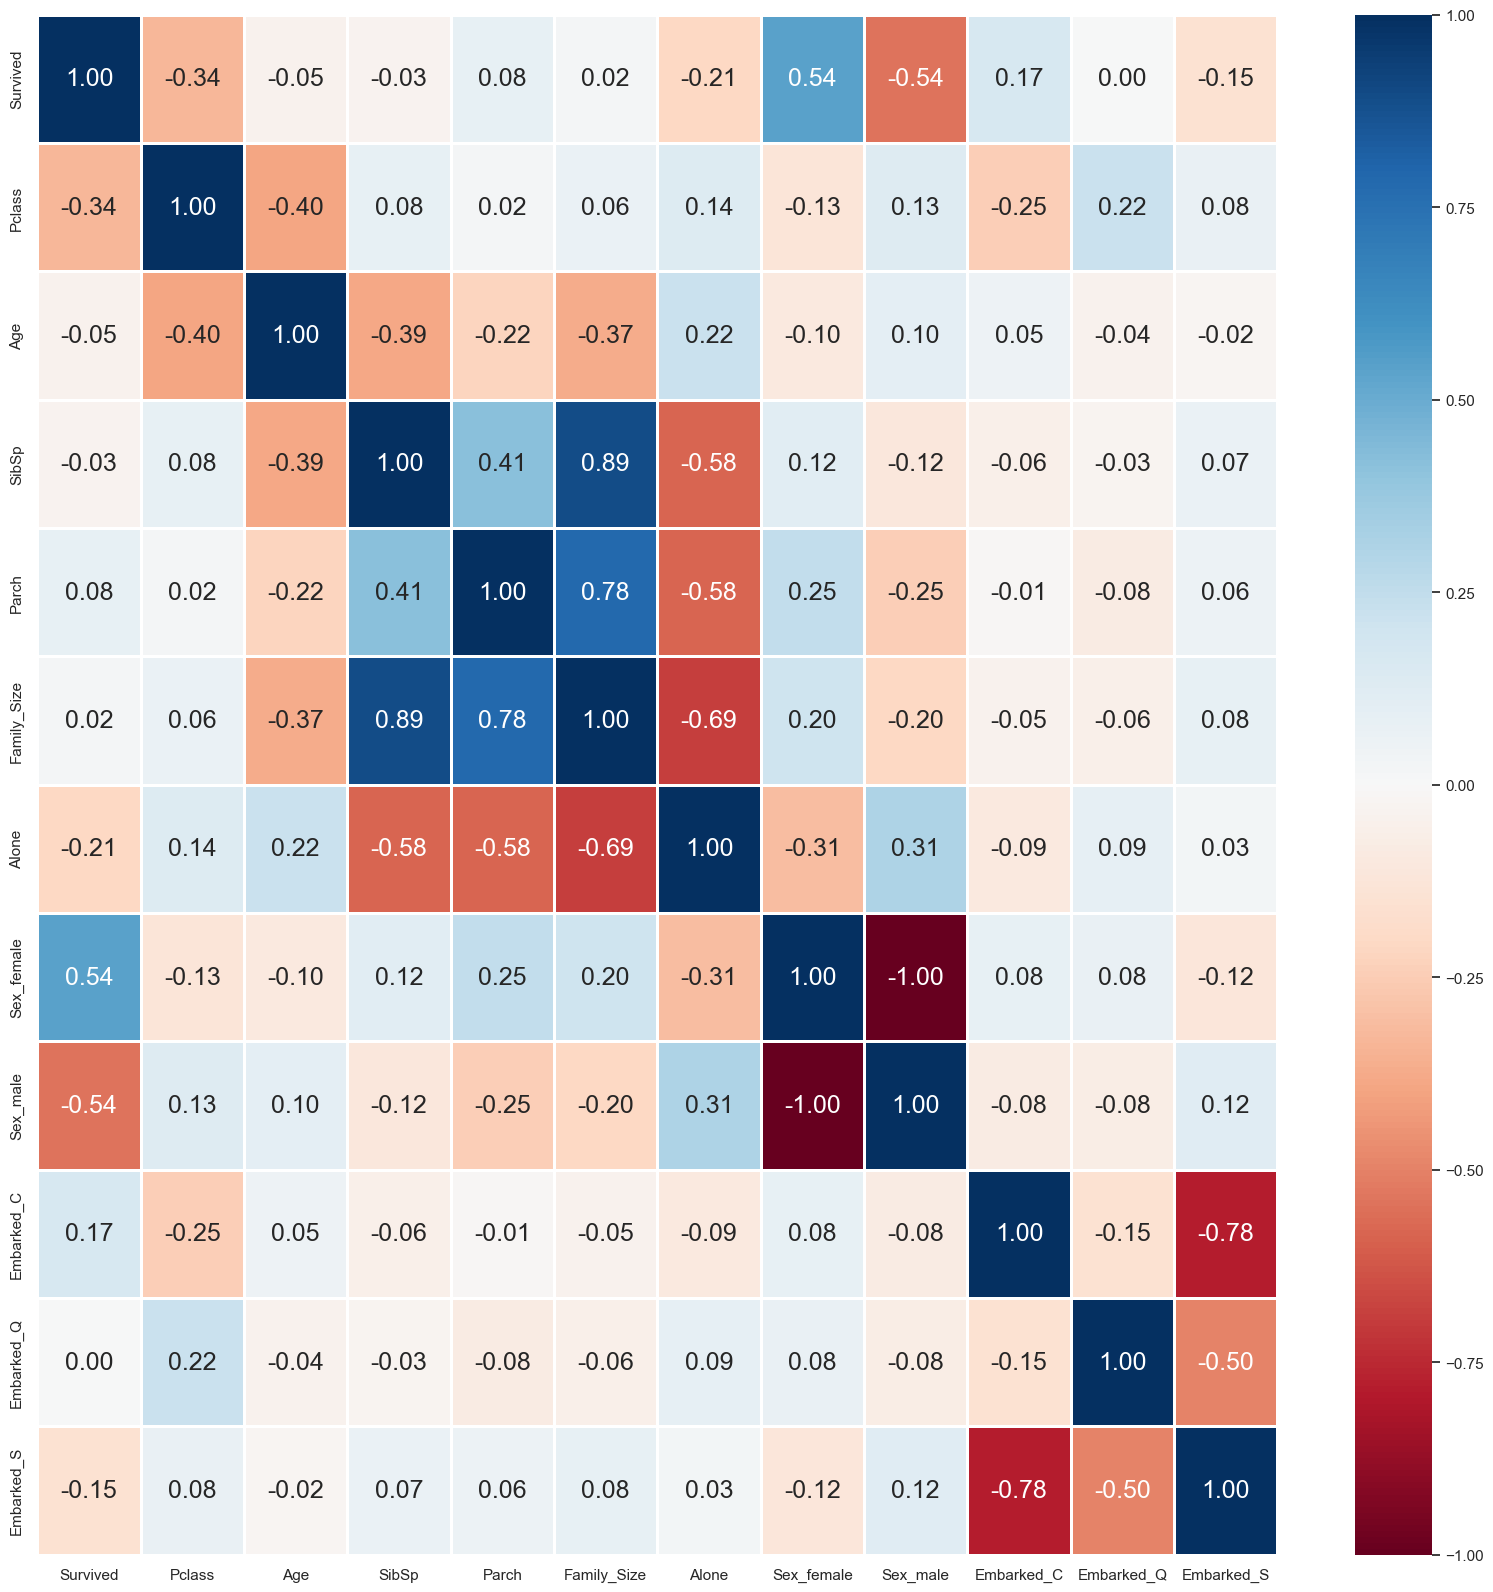

In [32]:
# Heatmap of the Correlation Matrix
f = plt.figure(figsize=(20, 20))
sb.heatmap(df.corr(), vmin = -1, vmax = 1, linewidths = 1,
           annot = True, fmt = ".2f", annot_kws = {"size": 18}, cmap = "RdBu")

Based on the heatmap, `Family_Size` and `SibSp` has the highest positive correlation of 0.89 followed by `Family_Size` and `Parch` of 0.78 but it is obvious as the `Family_Size` feature is dependent on `Parch` and `SibSp`. `Embarked_C` and `Embarked_S` has the highest negative correlation of -0.78 but we feel that it would not work as well as place of embarkation has no relationship with survivalbility.

---

<span style='font-size:x-large'>**Machine learning**</span>

<span style='font-size:medium'>**Spltting Dataset**</span>

We splitted the dataset into a train and test set with a distribution of 70% train and 30% test. 

In [33]:
X = pd.DataFrame(df.drop('Survived', axis = 1))
y = df.Survived
                 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state =13)

<span style='font-size:medium'>**Random Forest Training**</span>

We trained a random forest model using the `RandomForestClassifier` function imported.

In [34]:
rf = RandomForestClassifier(max_leaf_nodes=2)
rf.fit(X_train, y_train)

RandomForestClassifier(max_leaf_nodes=2)

<span style='font-size:medium'>**Decision Tree Training**</span>

We then trained another model using Decision Tree.

[Text(0.5, 0.9, 'Sex_female <= 0.5\ngini = 0.464\nsamples = 622\nvalue = [394, 228]\nclass = 0'),
 Text(0.25, 0.7, 'Pclass <= 1.5\ngini = 0.299\nsamples = 405\nvalue = [331, 74]\nclass = 0'),
 Text(0.125, 0.5, 'Age <= 38.5\ngini = 0.462\nsamples = 91\nvalue = [58.0, 33.0]\nclass = 0'),
 Text(0.0625, 0.3, 'Age <= 17.5\ngini = 0.494\nsamples = 36\nvalue = [16, 20]\nclass = 1'),
 Text(0.03125, 0.1, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]\nclass = 1'),
 Text(0.09375, 0.1, 'gini = 0.498\nsamples = 34\nvalue = [16, 18]\nclass = 1'),
 Text(0.1875, 0.3, 'Age <= 75.5\ngini = 0.361\nsamples = 55\nvalue = [42, 13]\nclass = 0'),
 Text(0.15625, 0.1, 'gini = 0.346\nsamples = 54\nvalue = [42, 12]\nclass = 0'),
 Text(0.21875, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = 1'),
 Text(0.375, 0.5, 'Age <= 13.0\ngini = 0.227\nsamples = 314\nvalue = [273, 41]\nclass = 0'),
 Text(0.3125, 0.3, 'Family_Size <= 4.5\ngini = 0.491\nsamples = 30\nvalue = [17, 13]\nclass = 0'),
 Text(0.28125, 0.1, 'gini =

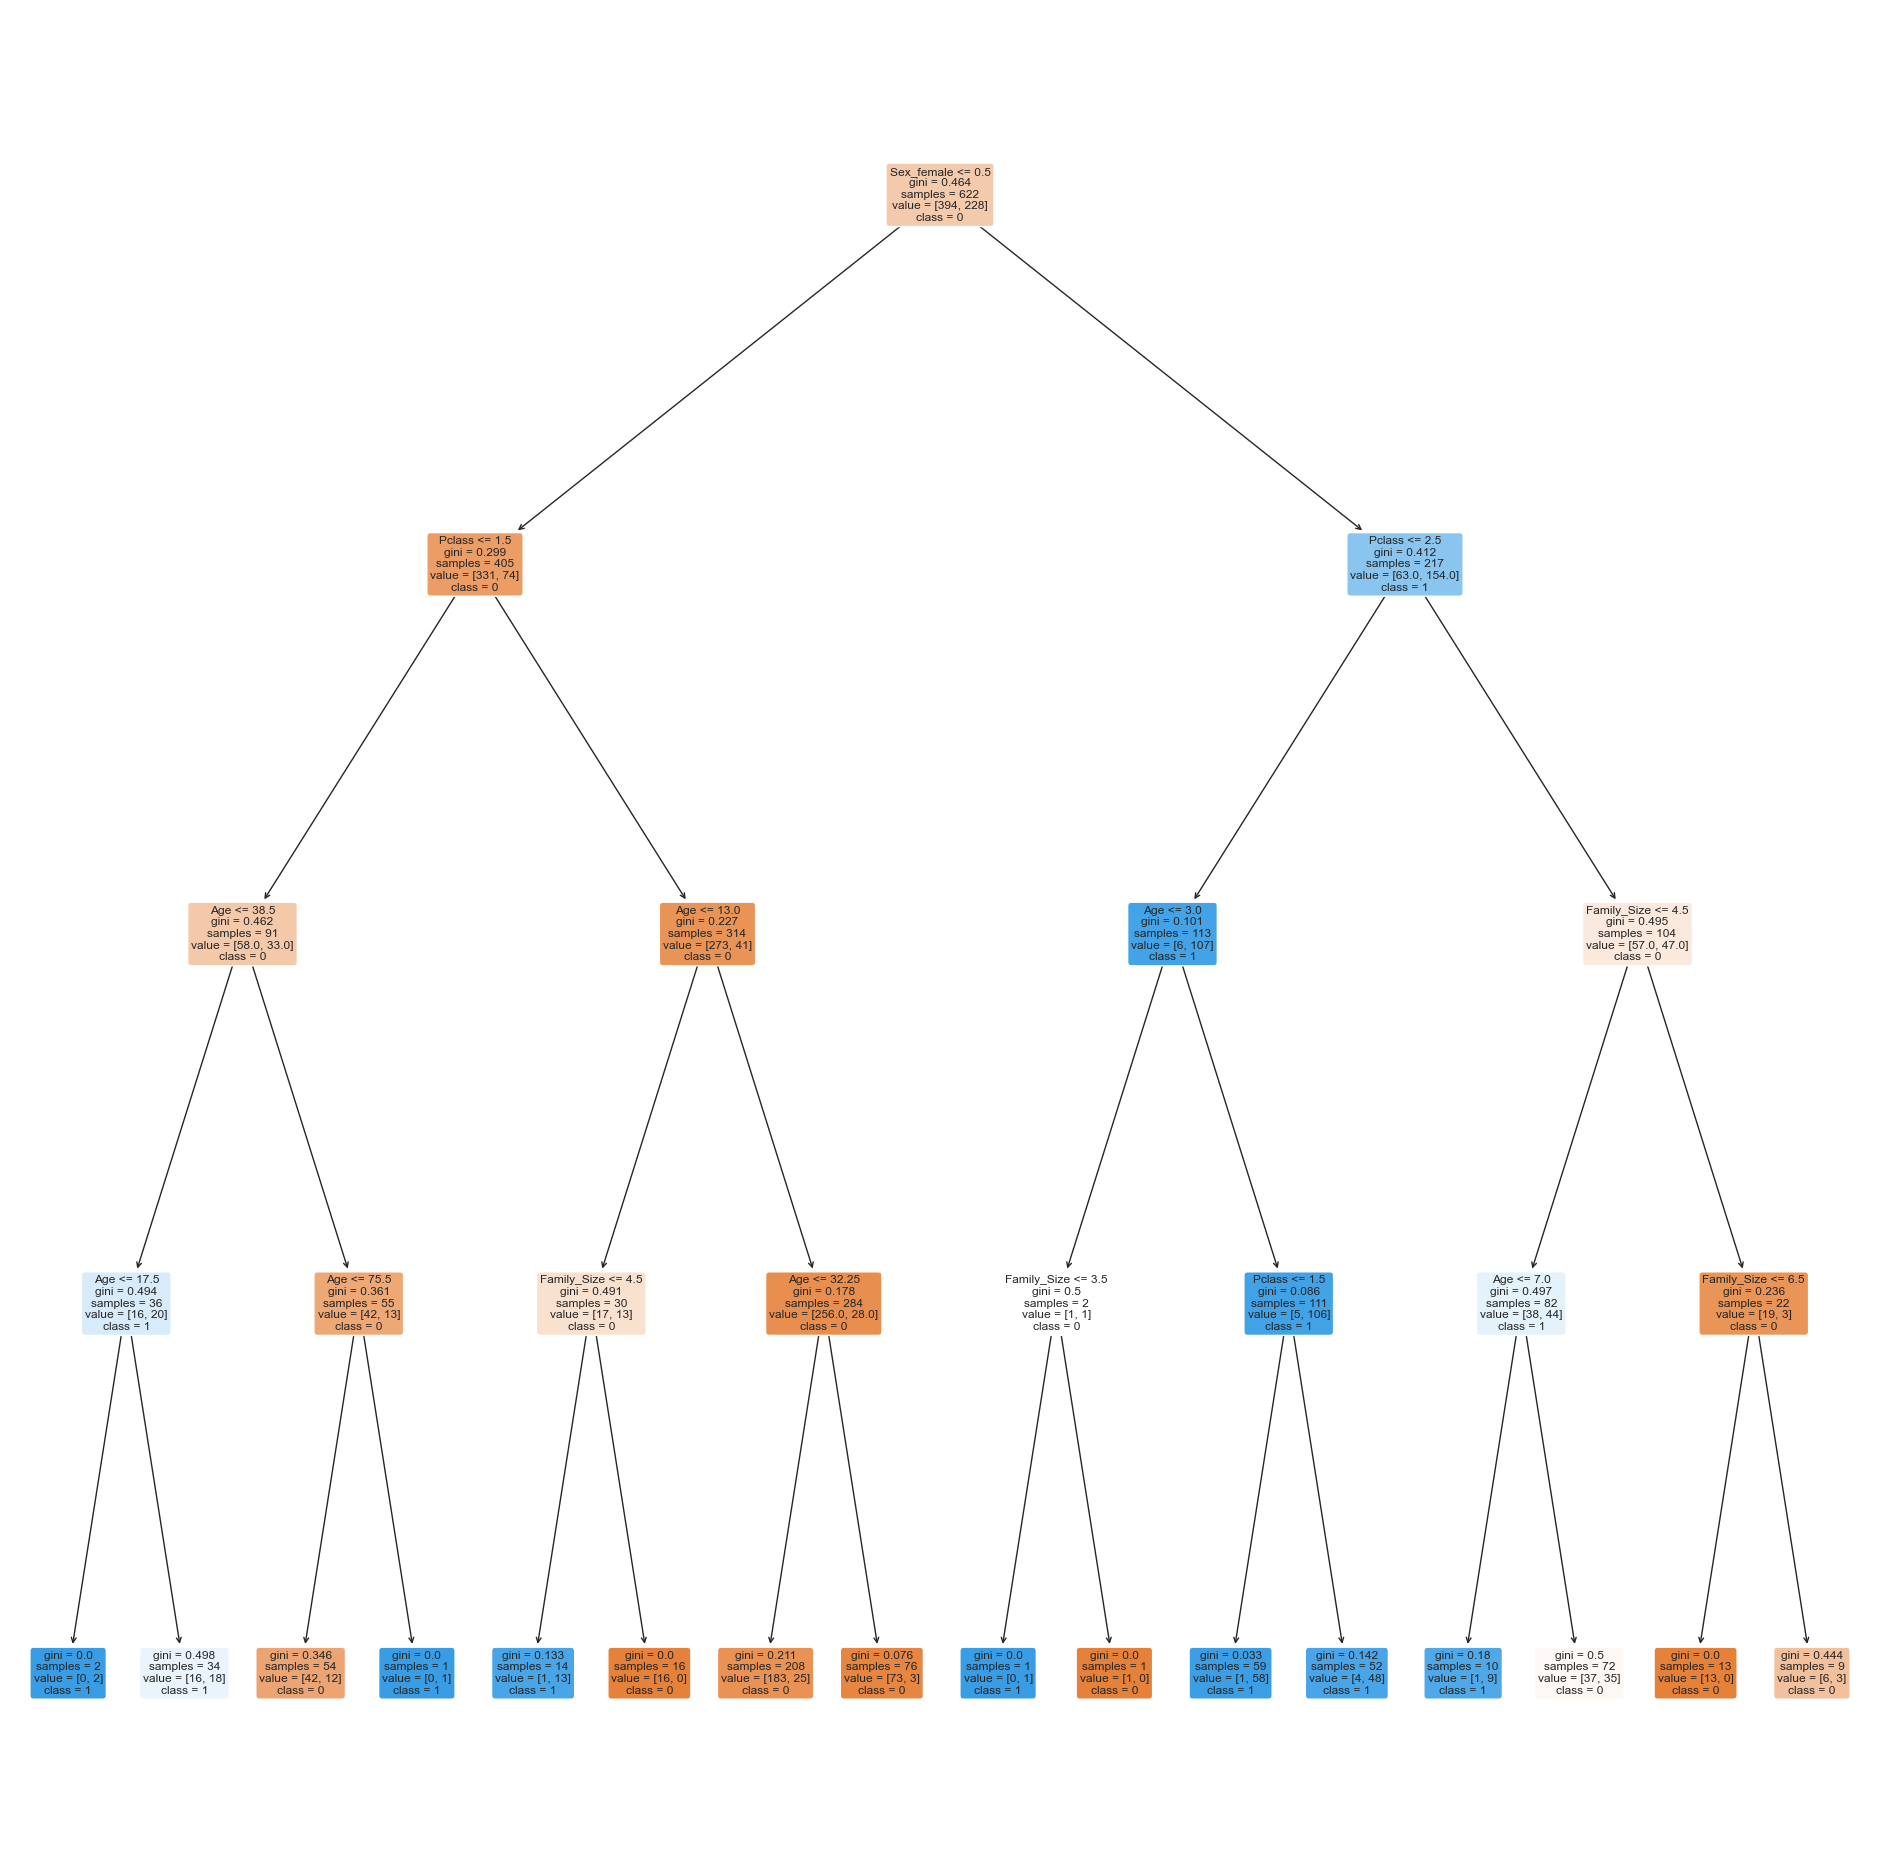

In [35]:
#Plotting of decision tree
dectree = DecisionTreeClassifier(max_depth = 4) 
dectree.fit(X_train, y_train)  

f = plt.figure(figsize=(24,24))
plot_tree(dectree, filled=True, rounded=True, 
          feature_names=X_train.columns, 
          class_names=["0","1"])

---

<span style='font-size:x-large'>**Results Analysis**</span>


In [36]:
# Create a function to print TPR and FPR
def perf_measure(y_actual, y_pred):
    CM = confusion_matrix(y_actual, y_pred)
    
    TN = CM[0][0]
    FN = CM[1][0]
    TP = CM[1][1]
    FP = CM[0][1]
    
    TPR = TP / (TP + FN)
    FPR = FP / (FP + TN)
    
    print("True Positive Rate \t\t:", round(TPR,4))
    print("False Positive Rate \t\t:", round(FPR,4))

<span style='font-size:medium'>**Random Forest Result Analysis**</span>


In [37]:
rf_pred = rf.predict(X_test)
rf_acc = accuracy_score(y_test, rf_pred)

print(f'\nRandom Forest Accuracy = {round(100*rf_acc, 2)}%')


Random Forest Accuracy = 76.4%


**Classification Report**

Precision: a measure of how many of the positive predictions made are correct (true positives).

Recall: Recall is a measure of how many of the positive cases the classifier correctly predicted, over all the positive cases in the data.

F1-Score: a harmonic mean of both precision and recall. 

Support: the number of actual occurrences of the class in the dataset

In [38]:
print(classification_report(y_test, rf_pred, target_names=["perished", "survived"]))

              precision    recall  f1-score   support

    perished       0.74      0.91      0.82       155
    survived       0.82      0.56      0.67       112

    accuracy                           0.76       267
   macro avg       0.78      0.74      0.74       267
weighted avg       0.77      0.76      0.75       267



The classification report shows a large gap between precision and recall, which may be attributed to the imbalance in the dataset, where there are significantly more datapoints on passengers who perished than those who survived.

**ROC Curve**  

The ROC curve visually represents the trade-off between the true positive rate and false positive rate.



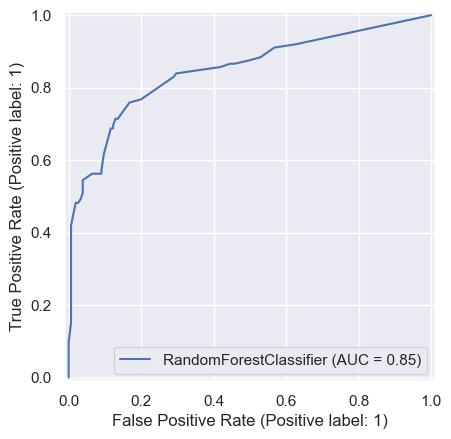

In [39]:
RocCurveDisplay.from_estimator(rf, X_test, y_test)

The AUC for this random forest classifier is 0.85. It's not high enough to indicate the possiblity of overfitting, but still shows a siginificant discriminatory power.

**Goodness of Fit**  

Summary of Random Forest results

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.7733
True Positive Rate 		: 0.5746
False Positive Rate 		: 0.1117

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.764
True Positive Rate 		: 0.5625
False Positive Rate 		: 0.0903



<Axes: >

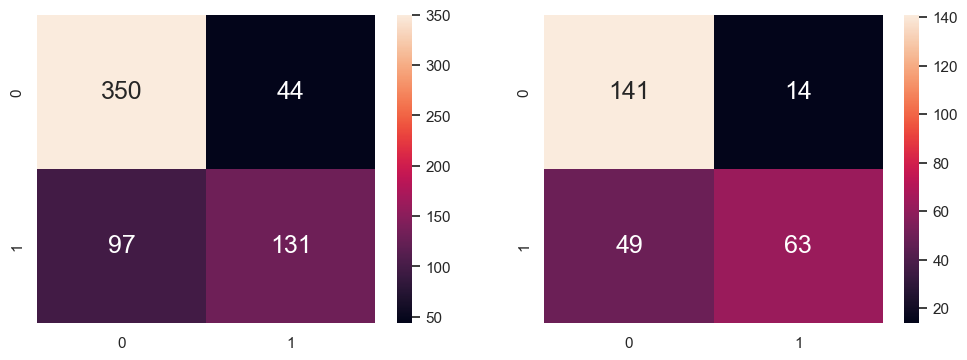

In [40]:
# Predict all variables corresponding to Survivability Train
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", round(rf.score(X_train, y_train),4))
perf_measure(y_train, y_train_pred)
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", round(rf.score(X_test, y_test),4))
perf_measure(y_test, y_test_pred)
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

**Decision Tree Classifier Result Analysis**


In [41]:
dectree_pred = dectree.predict(X_test)
dectree_acc = accuracy_score(y_test, dectree_pred)

print(f'\nDecision Tree Accuracy = {round(100*dectree_acc, 2)}%')


Decision Tree Accuracy = 77.53%


**Classification Report**

Precision: a measure of how many of the positive predictions made are correct (true positives).

Recall: a measure of how many of the positive cases the classifier correctly predicted, over all the positive cases in the data.

F1-Score: a harmonic mean of both precision and recall.

Support: the number of actual occurrences of the class in the dataset



In [42]:
print(classification_report(y_test, dectree_pred, target_names=["perished", "survived"]))

              precision    recall  f1-score   support

    perished       0.74      0.94      0.83       155
    survived       0.87      0.54      0.67       112

    accuracy                           0.78       267
   macro avg       0.81      0.74      0.75       267
weighted avg       0.80      0.78      0.76       267



The classification report indicates a low precision, high recall in predicting passengers who perished. Similarly for predicting passengers who survived, it indicates a high precision, but low recall. This significant imbalance could be due to the fact that the supplied dataset was unbalanced, with more datapoints for passengers who did not survive.

Due to the imbalance, more negative cases could become false positives, and, conversely, there are fewer positive casess that could become false negatives.



**ROC Curve**  

The ROC curve visually represents the trade-off between the true positive rate and false positive rate.

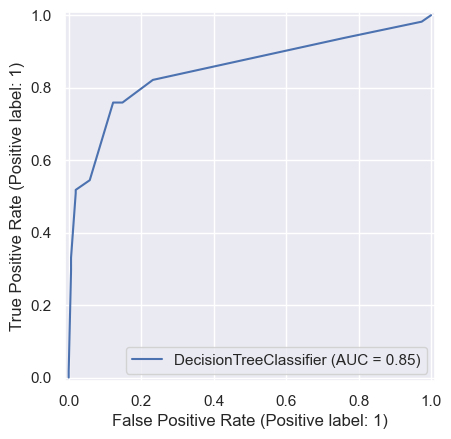

In [43]:
RocCurveDisplay.from_estimator(dectree, X_test, y_test)

Similar to the ROC curve for the random forest model, with a AUC of 0.85, it also is not high enough to point to any overfitting, but still indicates a significant discriminatory power.

**Goodness of Fit**

Summary of Decision Tree results



Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.8376
True Positive Rate 		: 0.6579
False Positive Rate 		: 0.0584

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.7753
True Positive Rate 		: 0.5446
False Positive Rate 		: 0.0581



<Axes: >

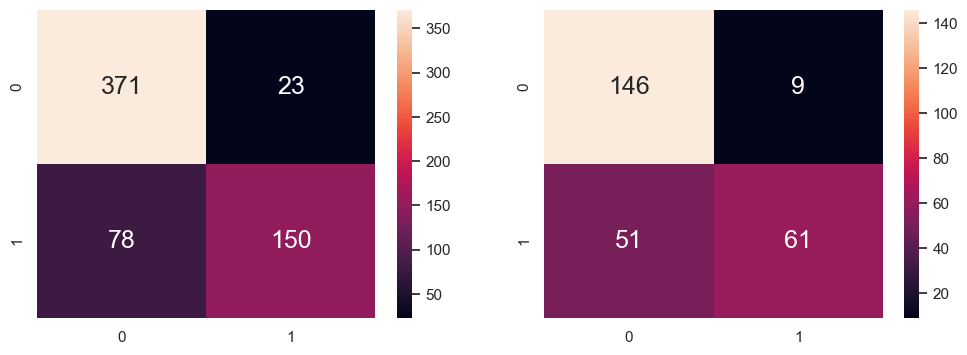

In [44]:
y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", round(dectree.score(X_train, y_train),4))
perf_measure(y_train, y_train_pred)
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", round(dectree.score(X_test, y_test),4))
perf_measure(y_test, y_test_pred)
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])


<span style='font-size:x-large'>**Upsampling**</span>

Our results analysis suggests that the data imbalance could be negatively impacting the performance of the models. Hence, to improve the model performance, we have decided to try upsampling. Specifically, we will be upsampling the datapoints of passengers who survived. 


In [45]:
from sklearn.utils import resample

not_survive = df[df.Survived == 0]
survive = df[df.Survived == 1]
 
survive_up = resample(survive, replace=True, n_samples=not_survive.shape[0])
 
df_up = pd.concat([not_survive, survive_up])
 
df_up['Survived'].value_counts()

Survived
0    549
1    549
Name: count, dtype: int64

---

#### <span style='font-size:x-large'>Machine Learning 2.0</span>

We will be performing machine learning for the upsampled dataset



In [46]:
X = pd.DataFrame(df_up.drop('Survived', axis = 1))
y = df_up.Survived

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state =13)

In [47]:
rf = RandomForestClassifier(max_leaf_nodes=2)
rf.fit(X_train, y_train)

RandomForestClassifier(max_leaf_nodes=2)

[Text(0.5288461538461539, 0.9, 'Sex_male <= 0.5\ngini = 0.5\nsamples = 768\nvalue = [379, 389]\nclass = 1'),
 Text(0.3076923076923077, 0.7, 'Pclass <= 2.5\ngini = 0.287\nsamples = 323\nvalue = [56, 267]\nclass = 1'),
 Text(0.15384615384615385, 0.5, 'Age <= 3.0\ngini = 0.071\nsamples = 190\nvalue = [7.0, 183.0]\nclass = 1'),
 Text(0.07692307692307693, 0.3, 'Family_Size <= 3.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]\nclass = 0'),
 Text(0.038461538461538464, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = 1'),
 Text(0.11538461538461539, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]\nclass = 0'),
 Text(0.23076923076923078, 0.3, 'Age <= 56.5\ngini = 0.062\nsamples = 188\nvalue = [6.0, 182.0]\nclass = 1'),
 Text(0.19230769230769232, 0.1, 'gini = 0.053\nsamples = 183\nvalue = [5, 178]\nclass = 1'),
 Text(0.2692307692307692, 0.1, 'gini = 0.32\nsamples = 5\nvalue = [1, 4]\nclass = 1'),
 Text(0.46153846153846156, 0.5, 'Family_Size <= 4.5\ngini = 0.465\nsamples = 133\nvalue = [49, 84]\ncl

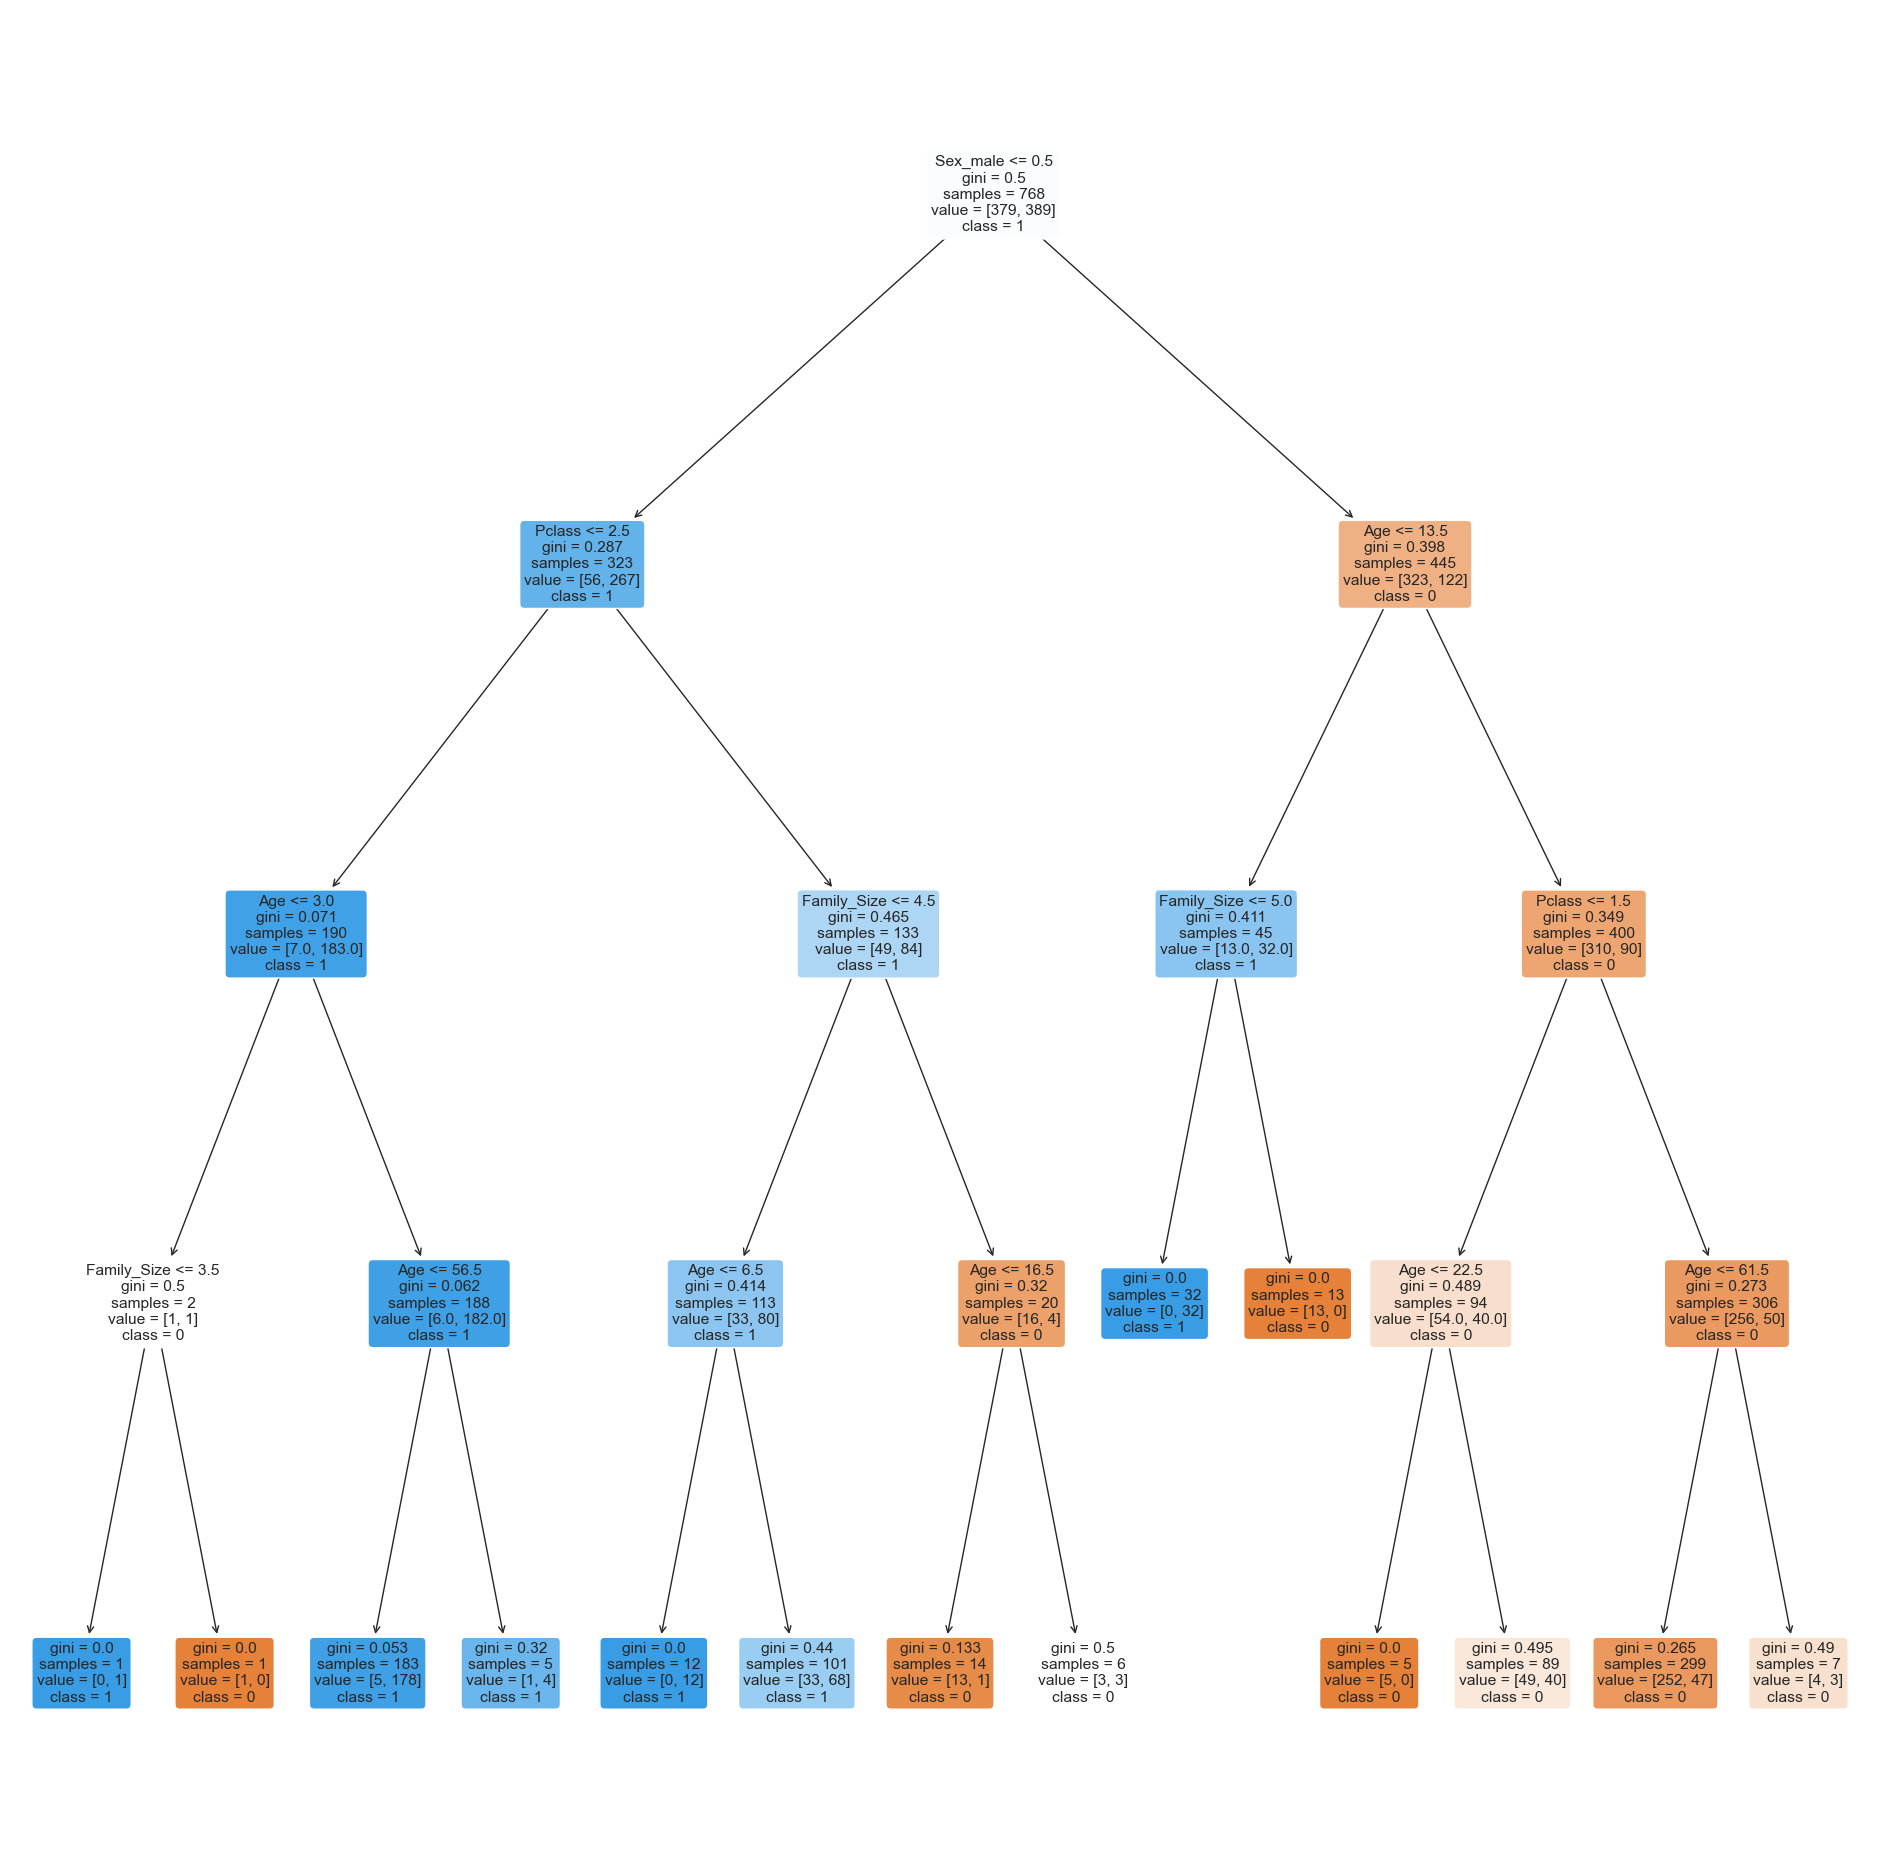

In [48]:
dectree = DecisionTreeClassifier(max_depth = 4) 
dectree.fit(X_train, y_train)  

f = plt.figure(figsize=(24,24))
plot_tree(dectree, filled=True, rounded=True, 
          feature_names=X_train.columns, 
          class_names=["0","1"])

---

##### <span style='font-size:x-large'>**Results Analysis 2.0**</span>

We will now be analysing the machine learning result for our upsampled dataset



<span style='font-size:large'>**Random Forest Result Analysis**</span>


In [49]:
rf_pred = rf.predict(X_test)
rf_acc = accuracy_score(y_test, rf_pred)

print(f'\nRandom Forest Accuracy = {round(100*rf_acc, 2)}%')


Random Forest Accuracy = 76.97%


**Classification Report**

Precision: a measure of how many of the positive predictions made are correct \(true positives\).

Recall: a measure of how many of the positive cases the classifier correctly predicted, over all the positive cases in the data.

F1\-Score: a harmonic mean of both precision and recall.

Support: the number of actual occurrences of the class in the dataset



In [50]:
print(classification_report(y_test, rf_pred, target_names=["perished", "alive"]))

              precision    recall  f1-score   support

    perished       0.74      0.85      0.79       170
       alive       0.81      0.68      0.74       160

    accuracy                           0.77       330
   macro avg       0.78      0.77      0.77       330
weighted avg       0.78      0.77      0.77       330



After upsampling, the gap between precision and recall narrowed slightly, though the gap still persists. The overall accuracy also fell marginally. This could indicate that more steps need to be taken to improve the model performance.

**ROC Curve**

The ROC curve visually represents the trade\-off between the true positive rate and false positive rate.



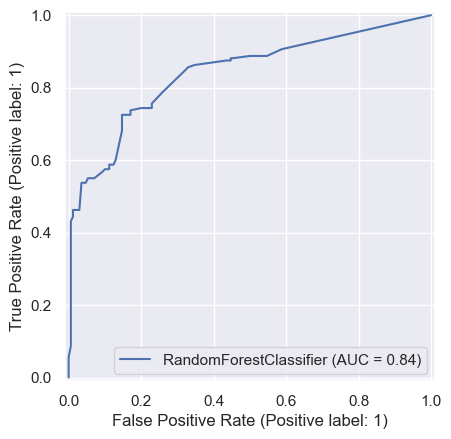

In [51]:
RocCurveDisplay.from_estimator(rf, X_test, y_test)

The AUC fell by 0.02, which indicates a slightly weaker discriminatory power as a result of the upsampling. Since the drop is marginal, it could be attributed to the lower false positives with the new balanced dataset.

**Goodness of Fit**

Summary of Random Forest results

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.7682
True Positive Rate 		: 0.6864
False Positive Rate 		: 0.1478

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.7697
True Positive Rate 		: 0.6812
False Positive Rate 		: 0.1471



<Axes: >

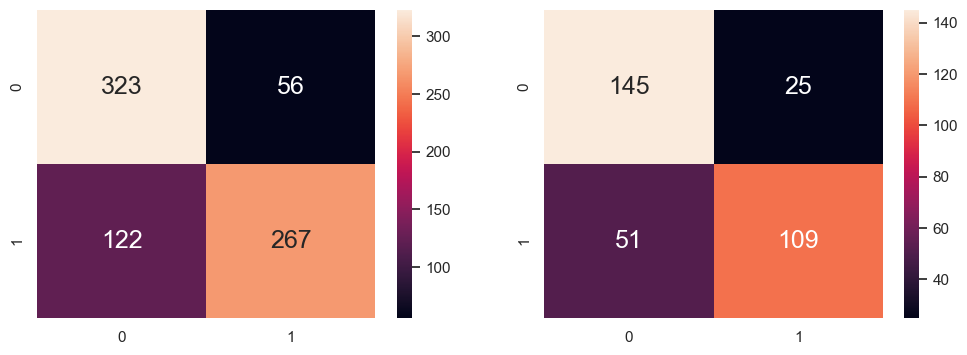

In [52]:
# Predict all variables corresponding to Survivability Train
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", round(rf.score(X_train, y_train),4))
perf_measure(y_train, y_train_pred)
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", round(rf.score(X_test, y_test),4))
perf_measure(y_test, y_test_pred)
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

<span style='font-size:large'>**Decision Tree Result Analysis**</span>


In [53]:
dectree_pred = dectree.predict(X_test)
dectree_acc = accuracy_score(y_test, dectree_pred)

print(f'\nDecision Accuracy = {round(100*dectree_acc, 2)}%')


Decision Accuracy = 81.52%


**Classification Report**

Precision: a measure of how many of the positive predictions made are correct \(true positives\).

Recall: a measure of how many of the positive cases the classifier correctly predicted, over all the positive cases in the data.

F1\-Score: a harmonic mean of both precision and recall.

Support: the number of actual occurrences of the class in the dataset


In [75]:
print(classification_report(y_test, dectree_pred, target_names=["perished", "survived"]))

              precision    recall  f1-score   support

    perished       0.78      0.89      0.83       170
    survived       0.86      0.74      0.79       160

    accuracy                           0.82       330
   macro avg       0.82      0.81      0.81       330
weighted avg       0.82      0.82      0.81       330



The imbalance between precision and recall before upsampling has been eliminated, indicating a significant reduction in false positives/false negatives. There is also an increase in accuracy. Overall, a slight improvement for Decision Tree.

**ROC Curve**

The ROC curve visually represents the trade\-off between the true positive rate and false positive rate.



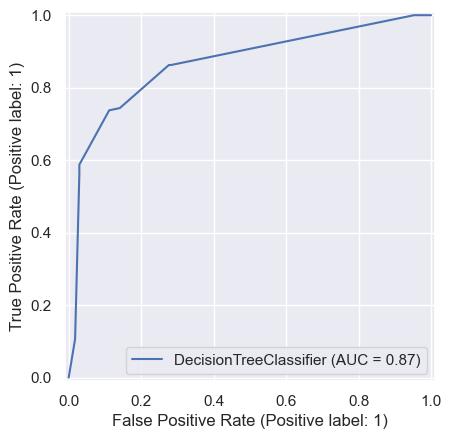

In [55]:
RocCurveDisplay.from_estimator(dectree, X_test, y_test)

Similar to random forest, there is a slight dip in the AUC. This may be attributed to the new datapoints sampled that may have reduced the false positives.

**Goodness of Fit**

Summary of Decrsion Tree results


Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.8268
True Positive Rate 		: 0.7584
False Positive Rate 		: 0.1029

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.8152
True Positive Rate 		: 0.7375
False Positive Rate 		: 0.1118



<Axes: >

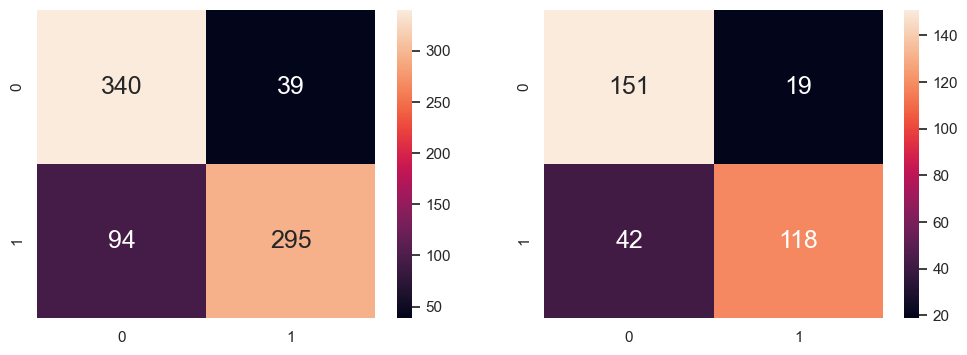

In [56]:
y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", round(dectree.score(X_train, y_train),4))
perf_measure(y_train, y_train_pred)
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", round(dectree.score(X_test, y_test),4))
perf_measure(y_test, y_test_pred)
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])


## Upsampling Conclusion

Overall, there was a slight dip in performance for Random Forest after implementing upsampling to balance the dataset. This could be due to various issues upsampling may introduce, such as the possibility of overfitting as a result of random forest's behaviour.

Decision Tree responded better to upsampling. While the overall accuracy wasn't largely affected, there was less of a skew in the classification report, indicating the a potential significant reduction in false positives.

We believe the models performances can still be improved further and decied to try one more method.

<span style='font-size:x-large'>**Removing Irrelavant Features**</span>

<span style='font-size:large'>**Lime Visualiser**</span>

Here, Lime is used to visualise how a feature impacted the classification of a random test case. The actual class is printed, then the prediction and visualisation is shown for each model.



In [57]:
y_test.reset_index(inplace=True, drop=True)
idx = np.random.randint(0, X_test.shape[0])
print("Actual Class:", y_test[idx])

explainer = lime.lime_tabular.LimeTabularExplainer(X_train.values, feature_names=X_train.columns.values.tolist())

Actual Class: 0


Random Forest

In [58]:
exp = explainer.explain_instance(X_test.values[idx], rf.predict_proba, num_features=11)
exp.show_in_notebook(show_table=True, show_all=True)

/Users/ggna/anaconda3/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Decision Tree

In [59]:
exp = explainer.explain_instance(X_test.values[idx], dectree.predict_proba, num_features=11)
exp.show_in_notebook(show_table=True, show_all=True)

/Users/ggna/anaconda3/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


Using the LIME visualisation of both models on the same datapoint, we can very clearly see that the following features hold insignificant impact, if any at all, on the models' decisions:
- `Embarked_S`
- `Embarked_C`
- `Embarked_Q`
- `SipSp`
- `Parch`

Following this, we will try training the models once again with the above features removed to see if it improves the models' performances.

**Removing Features**

In [60]:
df_rem = df_up.drop(columns=['Embarked_S', 'Embarked_C', 'Embarked_Q','SibSp', 'Parch'])

df_rem.head()

Survived  Pclass        Age  Family_Size  Alone  Sex_female  Sex_male
0         0       3  22.000000            2      0           0         1
4         0       3  35.000000            1      1           0         1
5         0       3  27.703111            1      1           0         1
6         0       1  54.000000            1      1           0         1
7         0       3   2.000000            5      0           0         1

---

#### <span style='font-size:x-large'>Machine Learning 3.0</span>

Training the models on the refined dataset.



In [61]:
X = pd.DataFrame(df_rem.drop('Survived', axis = 1))
y = df_rem.Survived

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state =13)

In [62]:
rf = RandomForestClassifier(max_leaf_nodes=2)
rf.fit(X_train, y_train)

RandomForestClassifier(max_leaf_nodes=2)

[Text(0.4351851851851852, 0.9, 'Sex_female <= 0.5\ngini = 0.5\nsamples = 768\nvalue = [379, 389]\nclass = 1'),
 Text(0.16666666666666666, 0.7, 'Age <= 13.5\ngini = 0.398\nsamples = 445\nvalue = [323, 122]\nclass = 0'),
 Text(0.07407407407407407, 0.5, 'Family_Size <= 5.0\ngini = 0.411\nsamples = 45\nvalue = [13.0, 32.0]\nclass = 1'),
 Text(0.037037037037037035, 0.3, 'gini = 0.0\nsamples = 32\nvalue = [0, 32]\nclass = 1'),
 Text(0.1111111111111111, 0.3, 'gini = 0.0\nsamples = 13\nvalue = [13, 0]\nclass = 0'),
 Text(0.25925925925925924, 0.5, 'Pclass <= 1.5\ngini = 0.349\nsamples = 400\nvalue = [310, 90]\nclass = 0'),
 Text(0.18518518518518517, 0.3, 'Age <= 22.5\ngini = 0.489\nsamples = 94\nvalue = [54.0, 40.0]\nclass = 0'),
 Text(0.14814814814814814, 0.1, 'gini = 0.0\nsamples = 5\nvalue = [5, 0]\nclass = 0'),
 Text(0.2222222222222222, 0.1, 'gini = 0.495\nsamples = 89\nvalue = [49, 40]\nclass = 0'),
 Text(0.3333333333333333, 0.3, 'Age <= 61.5\ngini = 0.273\nsamples = 306\nvalue = [256, 50]

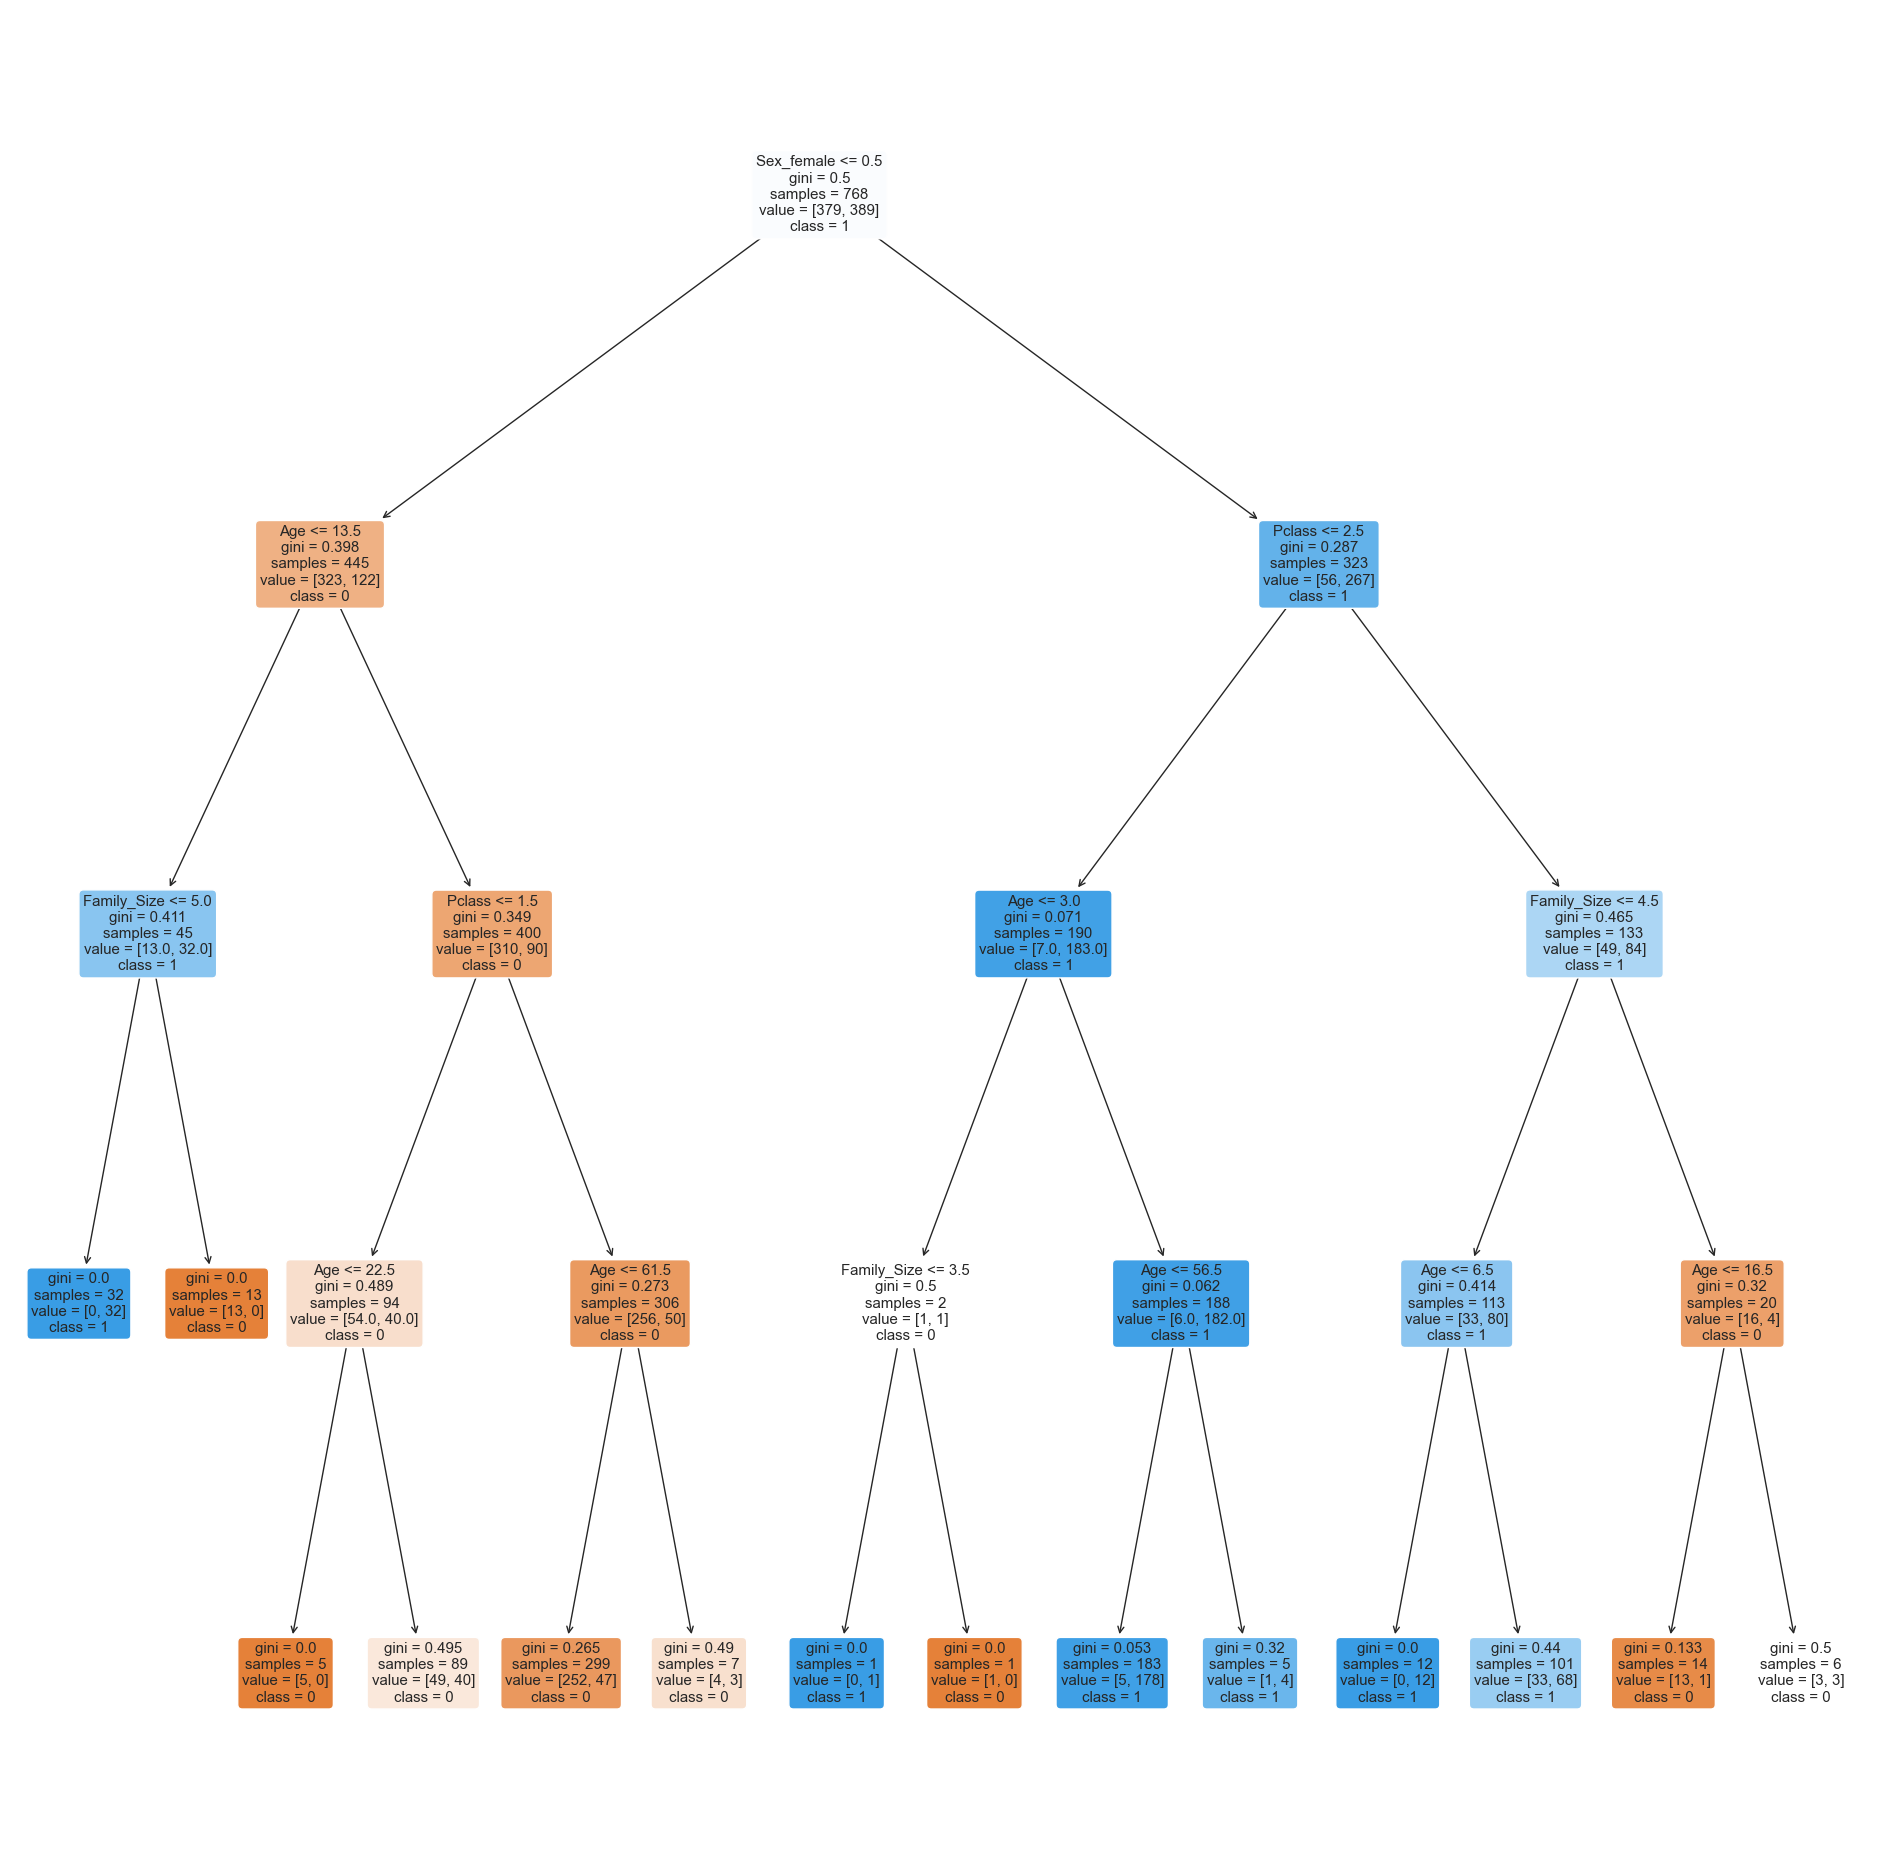

In [63]:
dectree = DecisionTreeClassifier(max_depth = 4) 
dectree.fit(X_train, y_train)  

f = plt.figure(figsize=(24,24))
plot_tree(dectree, filled=True, rounded=True, 
          feature_names=X_train.columns, 
          class_names=["0","1"])

---

##### <span style='font-size:x-large'>**Results Analysis 3.0**</span>

We will now be analysing the machine learning result for our upsampled dataset



<span style='font-size:large'>**Random Forest Result Analysis**</span>


In [64]:
rf_pred = rf.predict(X_test)
rf_acc = accuracy_score(y_test, rf_pred)

print(f'\nRandom Forest Accuracy = {round(100*rf_acc, 2)}%')


Random Forest Accuracy = 76.97%


**Classification Report**

Precision: a measure of how many of the positive predictions made are correct \(true positives\).

Recall: a measure of how many of the positive cases the classifier correctly predicted, over all the positive cases in the data.

F1\-Score: a harmonic mean of both precision and recall.

Support: the number of actual occurrences of the class in the dataset



In [65]:
print(classification_report(y_test, rf_pred, target_names=["perished", "alive"]))

              precision    recall  f1-score   support

    perished       0.74      0.85      0.79       170
       alive       0.81      0.68      0.74       160

    accuracy                           0.77       330
   macro avg       0.78      0.77      0.77       330
weighted avg       0.78      0.77      0.77       330



Despite removing irrelevant features, the classification report does not reflect much changes, neither in the way of improvement, nor otherwise. Overall accuracy dropped slightly, but no other changes of note.

**ROC Curve**

The ROC curve visually represents the trade\-off between the true positive rate and false positive rate.



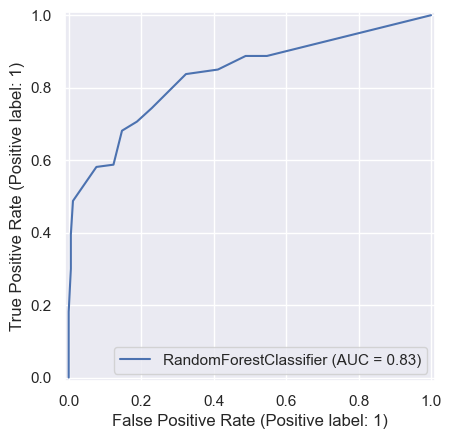

In [66]:
RocCurveDisplay.from_estimator(rf, X_test, y_test)

Compared to the previous stage, AUC fell marginally.

**Goodness of Fit**

Summary of Random Forest results

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.7682
True Positive Rate 		: 0.6864
False Positive Rate 		: 0.1478

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.7697
True Positive Rate 		: 0.6812
False Positive Rate 		: 0.1471



<Axes: >

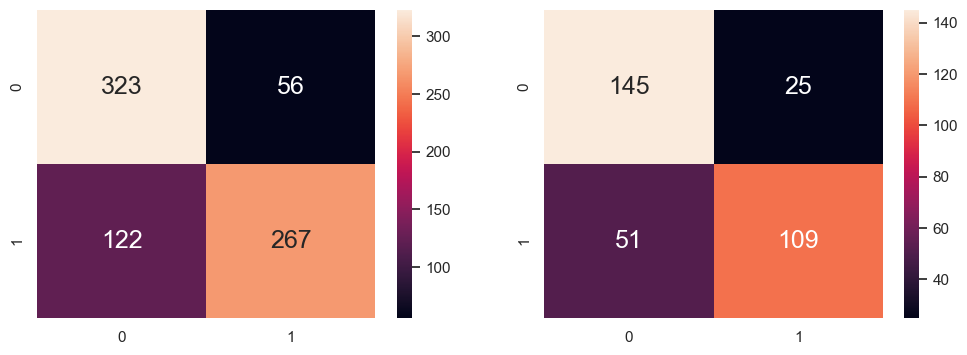

In [67]:
# Predict all variables corresponding to Survivability Train
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", round(rf.score(X_train, y_train),4))
perf_measure(y_train, y_train_pred)
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", round(rf.score(X_test, y_test),4))
perf_measure(y_test, y_test_pred)
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

<span style='font-size:large'>**Decision Tree Result Analysis**</span>


In [68]:
dectree_pred = dectree.predict(X_test)
dectree_acc = accuracy_score(y_test, dectree_pred)

print(f'\nDecision Accuracy = {round(100*dectree_acc, 2)}%')


Decision Accuracy = 81.52%


**Classification Report**

Precision: a measure of how many of the positive predictions made are correct \(true positives\).

Recall: a measure of how many of the positive cases the classifier correctly predicted, over all the positive cases in the data.

F1\-Score: a harmonic mean of both precision and recall.

Support: the number of actual occurrences of the class in the dataset


In [76]:
print(classification_report(y_test, dectree_pred, target_names=["perished", "survived"]))

              precision    recall  f1-score   support

    perished       0.78      0.89      0.83       170
    survived       0.86      0.74      0.79       160

    accuracy                           0.82       330
   macro avg       0.82      0.81      0.81       330
weighted avg       0.82      0.82      0.81       330



With the features removed, the classification report indicates a slight imbalance in precision and recall. This could be a result of a higher rate of false positives/false negatives.

**ROC Curve**

The ROC curve visually represents the trade\-off between the true positive rate and false positive rate.



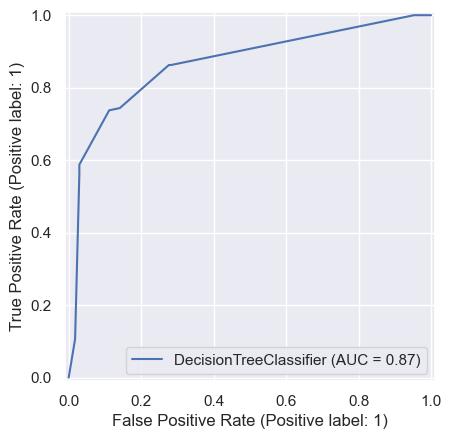

In [70]:
RocCurveDisplay.from_estimator(dectree, X_test, y_test)

The AUC fell by 0.01, indicating that the true positive rate against the false positive rate was about the same compared to the previous stage.

**Goodness of Fit**

Summary of Decision Tree results


Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.8268
True Positive Rate 		: 0.7584
False Positive Rate 		: 0.1029

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.8152
True Positive Rate 		: 0.7375
False Positive Rate 		: 0.1118



<Axes: >

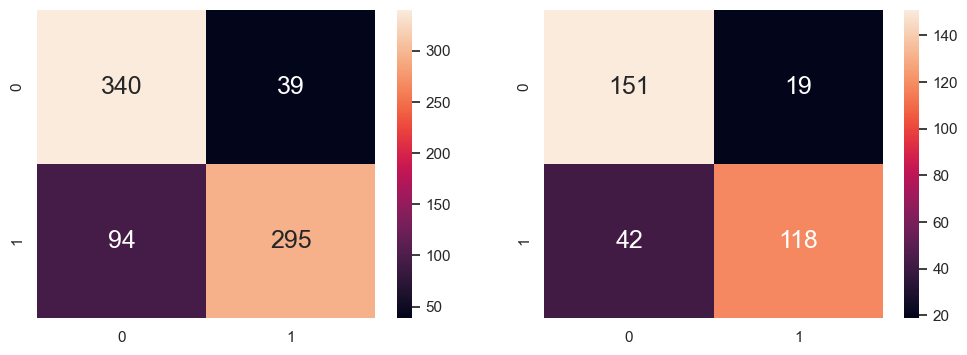

In [71]:
y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", round(dectree.score(X_train, y_train),4))
perf_measure(y_train, y_train_pred)
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", round(dectree.score(X_test, y_test),4))
perf_measure(y_test, y_test_pred)
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])


<span style='font-size:large'>**Lime Visualiser**</span>

Here, Lime is used to visualise how a feature impacted the classification of a random test case. The actual class is printed, then the prediction and visualisation is shown for each model.



In [72]:
y_test.reset_index(inplace=True, drop=True)
idx = np.random.randint(0, X_test.shape[0])
print("Actual Class:", y_test[idx])

explainer = lime.lime_tabular.LimeTabularExplainer(X_train.values, feature_names=X_train.columns.values.tolist())

Actual Class: 1


Random Forest

In [73]:
exp = explainer.explain_instance(X_test.values[idx], rf.predict_proba, num_features=11)
exp.show_in_notebook(show_table=True, show_all=True)

/Users/ggna/anaconda3/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Decision Tree

In [74]:
exp = explainer.explain_instance(X_test.values[idx], dectree.predict_proba, num_features=11)
exp.show_in_notebook(show_table=True, show_all=True)

/Users/ggna/anaconda3/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


## Removing Irrelevant Features Conclusion

Both models responded badly to the feature removal, if at all. The overall performance fell slightly. However, it might be substantial to note that the removal of features was performed on the upsampled, balanced dataset. Since balacing the dataset did not significantly impact the models performances either, it may have also been valid to test the removal of features on the original unbalanced dataset.

It is also equally possible that removing features may simply not be the appropriate method to use on this dataset and problem at all, and that an entirely different method should be explored.

# Conclusion

**Problem Statement**  
To reiterate, this goal of this notebook was to find out which features impacted the survivability of the passengers the most. We believe that we have sufficiently answered the question. The data indicates that the most impactful features were:

- `Sex_female` & `Sex_male`
- `Pclass`

We believe that the reason passenger's genders affect survivability so significantly is due to the potential evacuation policy during the sinking of the ship. Generally, in emergencies, women and children are evacuated first. This would lead to a higher rate of survivability in female passengers.

The class of ticket the passenger owned also played a big part. This could have been affected by the general location each class of passengers would have frequented. Certain classes may have been closer to the evacuation points, and others further, therefore having a substantial impact on the survivability of passengers based on their ticket class.


**Model Performance**  
For the most part, both models' performances were similar, with Decision Tree doing only marginally better than Random Forest.

We did not detect any overfitting in either of the models, but did feel that the performances could have been improved with certain refinements to the datasets. However, even with upsampling and feature removal, neither of the models responded well at all. No significant changes in their performances were detected, neither in the way of improvement nor deterioration.

Perhaps instead of only focusing on the dataset in the evaluation of the models' performances, we could also have considered the configuration of models themselves. No matter how refined a dataset is, if the models and their hyperparameters are not properly tuned, that could present as a potential bottleneck for the models' performances.